<center> <h1>MSDS 7331 - Project 2</h1> </center>
<center> <h1>Johnson Ekedum, Ekaterina Pirogova, Victor Yim</h1> </center>
<center> <h2>10/29/2017</h2> </center>
<center> <h1>Classification methods</h1> </center>

Porto Seguro is auto insurance company located in Brazil. This is essential for a company to determine a person who is likely to initiate an auto insureance claim the next year. If the person is likely to initiate the claim he will be billed more to cover the claim's costs. If the person isn't going to initiate the claim next year the company doesn't want to charge more this person and this way to get more customers. For this reason we were presented with a data set containing 595212 records of the drivers insured by this company and 59 features for each record. This features include the record id, the target variable wich represents if the person submitted claim or not and various categorical and contineous features.

In [259]:
#improt libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
import pylab
from pandas import Categorical
from sklearn.datasets import make_classification
import sklearn
from sklearn import svm
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import f_regression
from sklearn.datasets import make_classification
from sklearn import metrics as mt
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from pandas.tools.plotting import boxplot
from sklearn.metrics import mean_squared_error
import seaborn as sns; sns.set(style="white", color_codes=True)
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "palettes")))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets.samples_generator import make_blobs

In [3]:
#upload dataset
drivers=pd.read_csv('drivers.csv')
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
drivers.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

### Let's check missing values

In [5]:
# Replace missing values to NaN
drivers = drivers.replace(to_replace=-1,value=np.nan)
#Percent of missing values in dataset
missVal=drivers.isnull().sum()*100/len(drivers)
missVal.iloc[missVal.nonzero()]

ps_ind_02_cat     0.036290
ps_ind_04_cat     0.013945
ps_ind_05_cat     0.975955
ps_reg_03        18.106490
ps_car_01_cat     0.017977
ps_car_02_cat     0.000840
ps_car_03_cat    69.089837
ps_car_05_cat    44.782531
ps_car_07_cat     1.930237
ps_car_09_cat     0.095596
ps_car_11         0.000840
ps_car_12         0.000168
ps_car_14         7.160474
dtype: float64

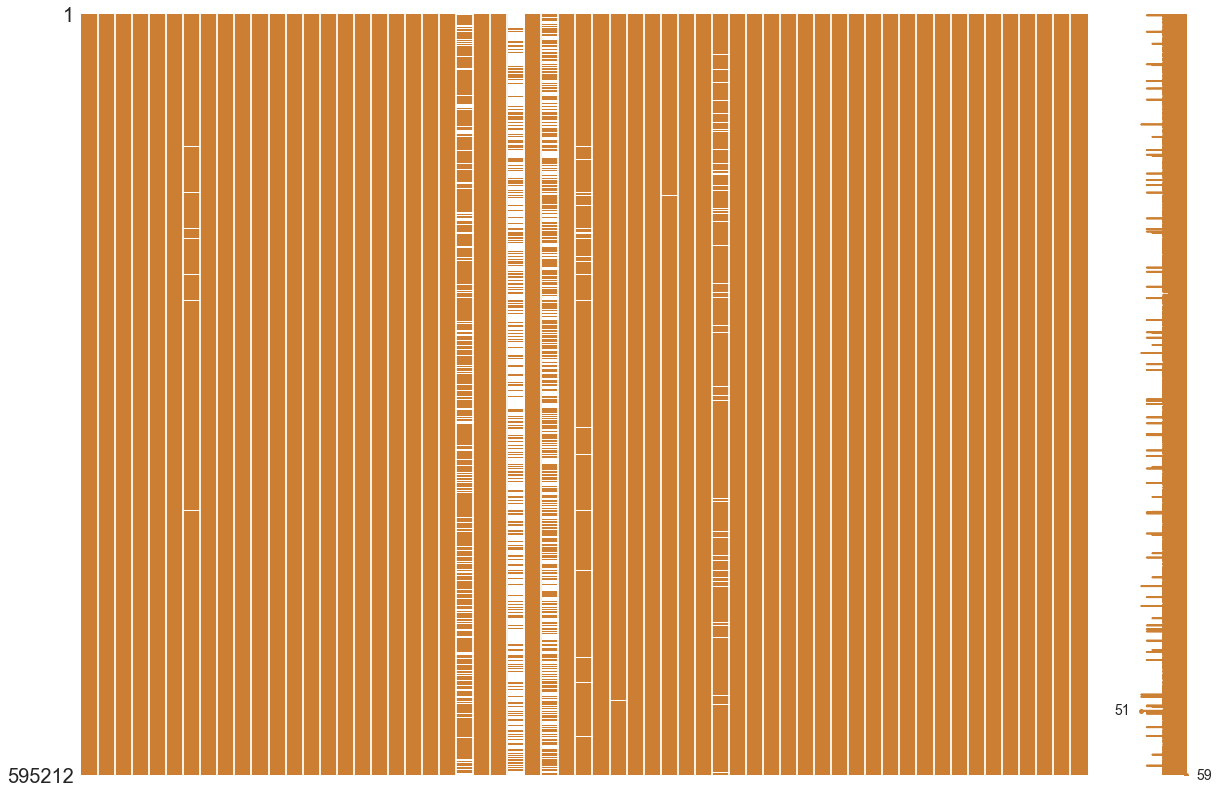

In [6]:
import missingno as msno

msno.matrix(df=drivers.iloc[:, :], figsize=(20, 14), color=(0.8, 0.5, 0.2))   

From the description to the data set we know that variables ending on "cat" or "bin" are categorical. And the rest either contineous or ordianal.<br>
From the visualizations below we can see that following variables are categorical:<br>
binary:<br>
ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin, ps_ind_04_cat, ps_car_02_cat, ps_car_03_cat, ps_car_05_cat, ps_car_07_cat, ps_car_08_cat

non-binary:<br>
ps_ind_02_cat, ps_ind_05_cat, ps_car_01_cat, ps_car_04_cat, ps_car_06_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat

We assume that following features are contineous because they have floating point number type with long tail of numbers after the point. The contineous features are:<br>
ps_reg_03, ps_car_12, ps_car_13, ps_car_14, ps_car_15

Ordinal features:<br>
ps_reg_01, ps_reg_02, ps_ind_01, ps_ind_03, ps_ind_14, ps_ind_15, ps_car_11, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04,
ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14

### Let's have a look of what each variable represents:

#### target variable. 
This variable represents if the insurance claim was made.

Text(0.5,0,u'target variable')

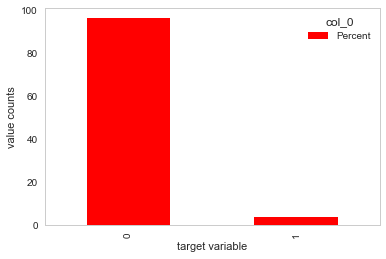

In [24]:
target_counts = pd.crosstab(index = drivers["target"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
target_counts.plot(kind='bar', stacked=True, color=['red'], grid=False)
plt.ylabel("value counts")
plt.xlabel('target variable')

We can see that our variable is highly unbalanced.

In [44]:
binary=['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
         'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
         'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'ps_ind_04_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 
         'ps_car_07_cat', 'ps_car_08_cat']




### Plot binary variables

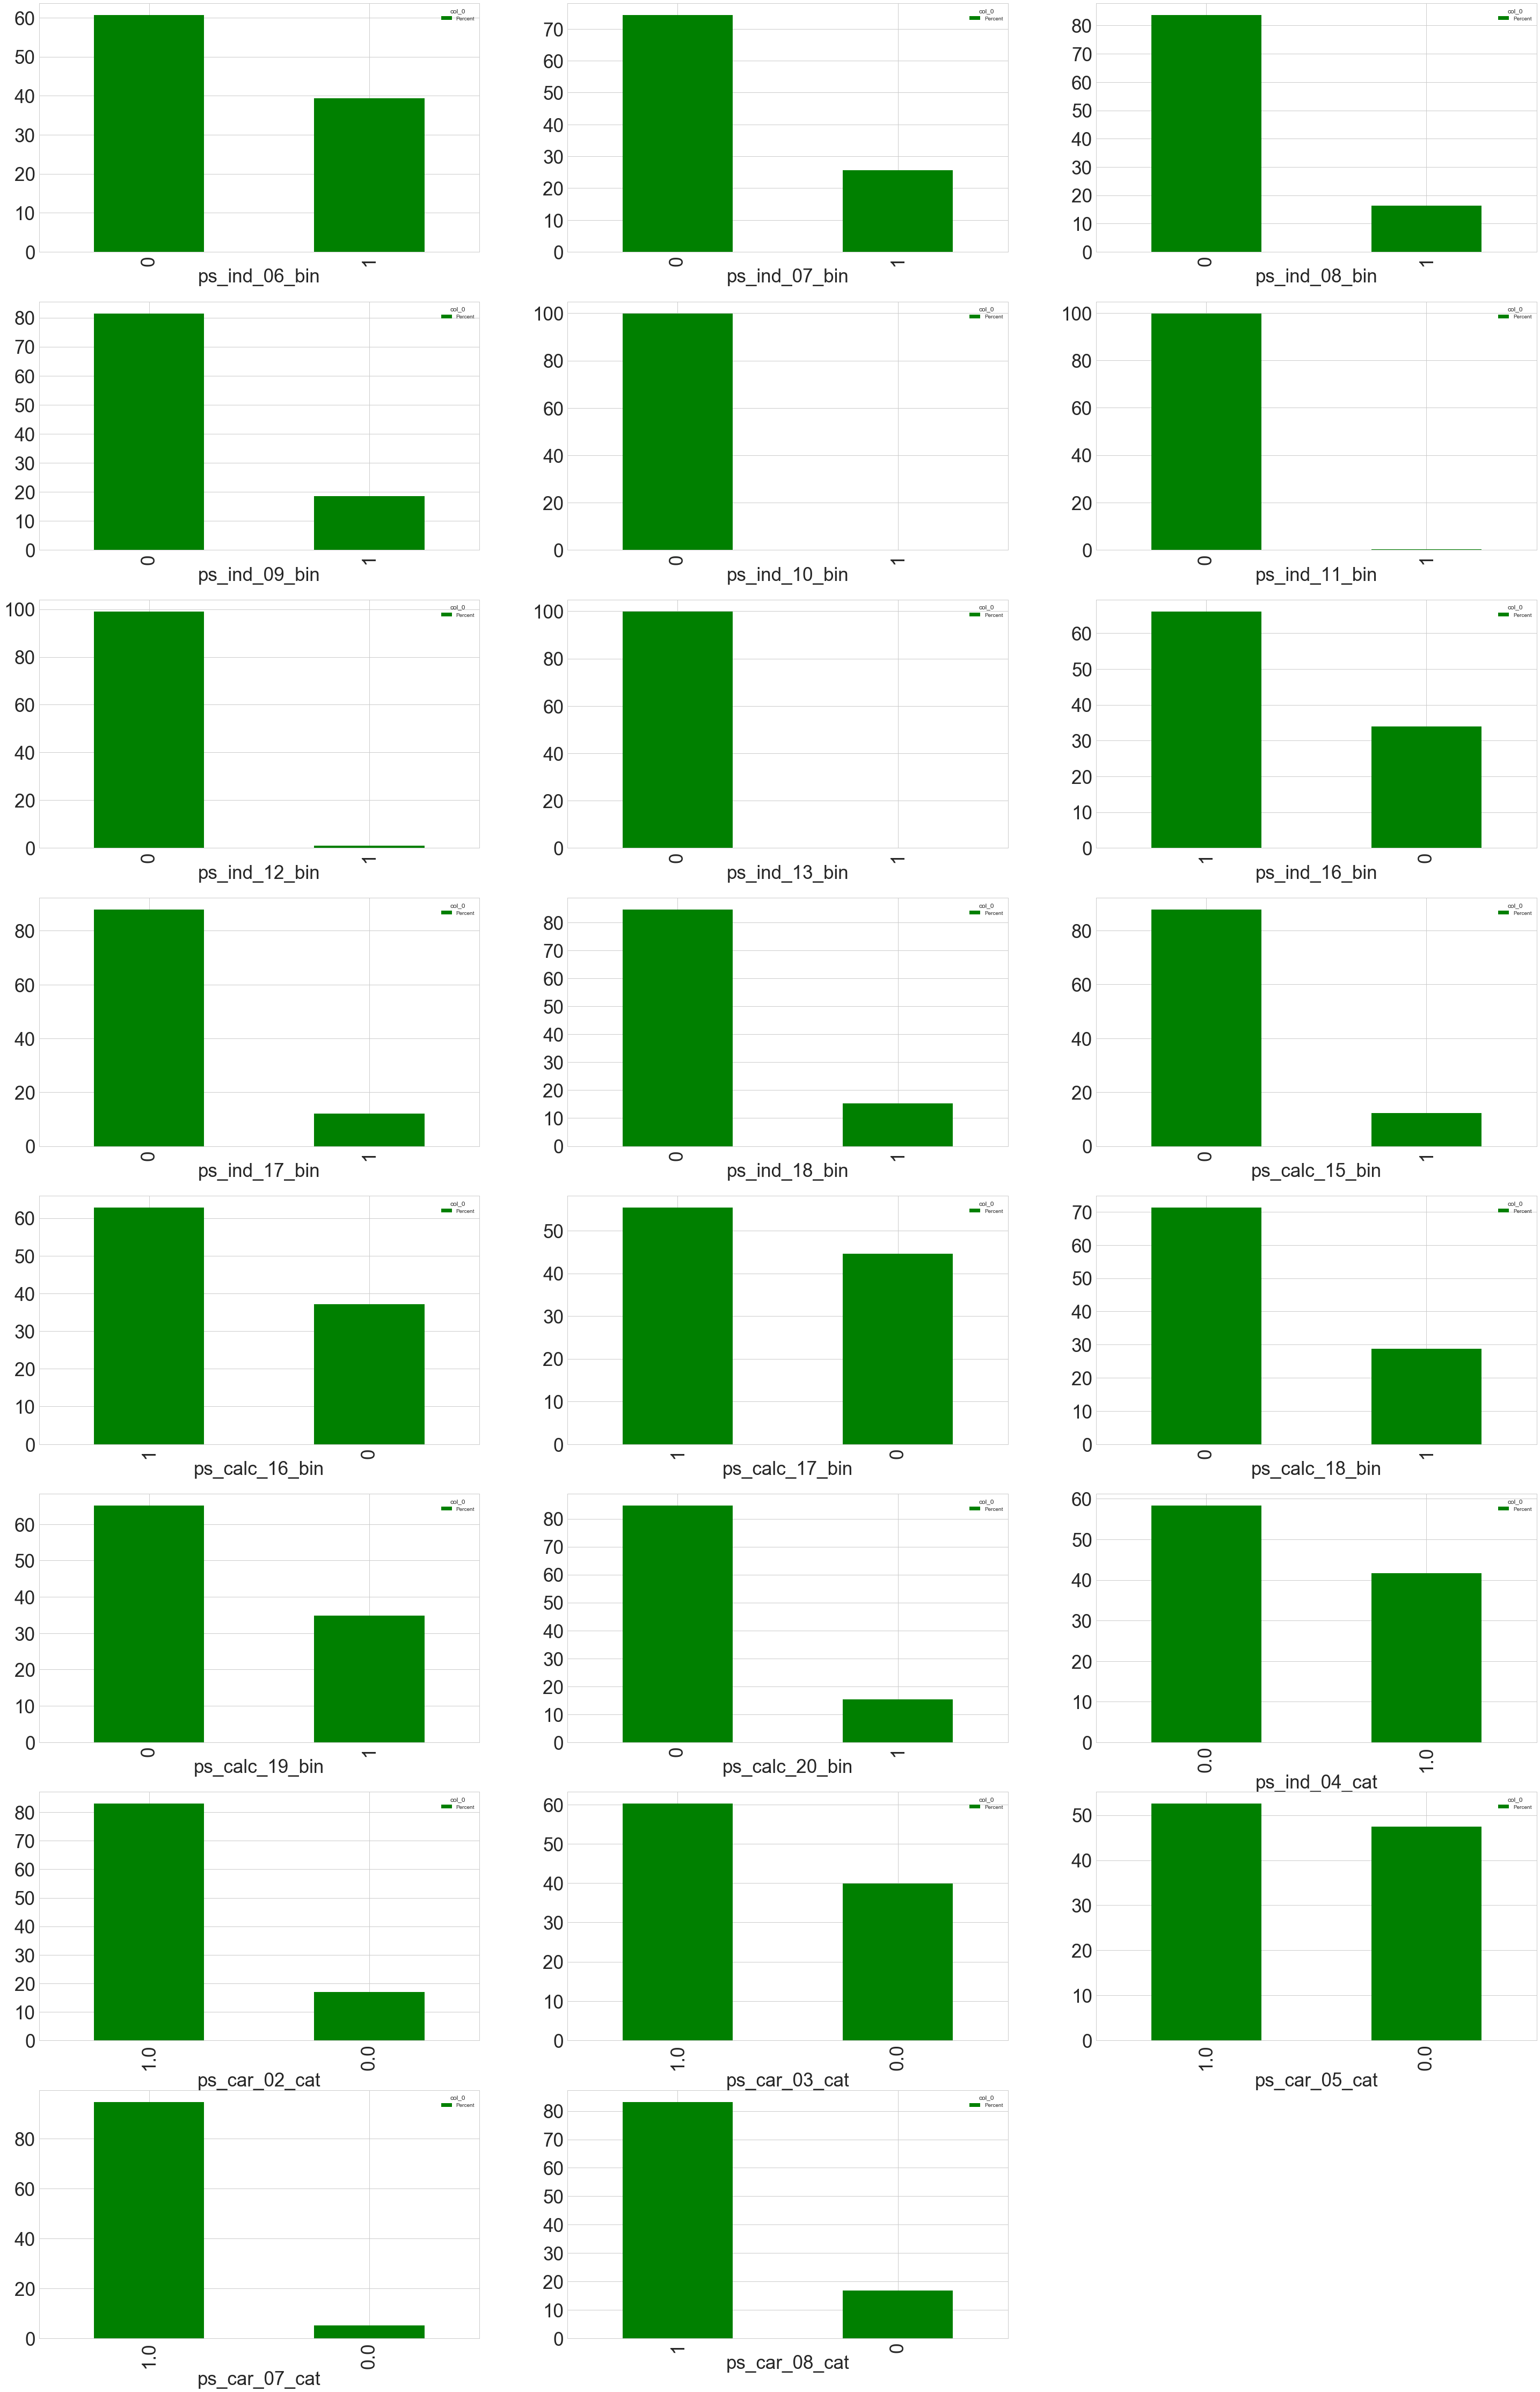

In [45]:
#plot binary variables
binary=['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
         'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
         'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'ps_ind_04_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 
         'ps_car_07_cat', 'ps_car_08_cat']
fig=plt.figure(figsize=(50,80))
for i, plot_vars in enumerate(binary):
    ax=fig.add_subplot(8,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(index=drivers[plot_vars], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
    
    counts.plot.bar(color="green",ax=ax)
    #print(counts)
plt.show()


We see, that following variables are indeed binary. We can see that most of them are unbalanced and some of them extremely unbalanced.
Let's check the variation of target variable across levels of this variables.

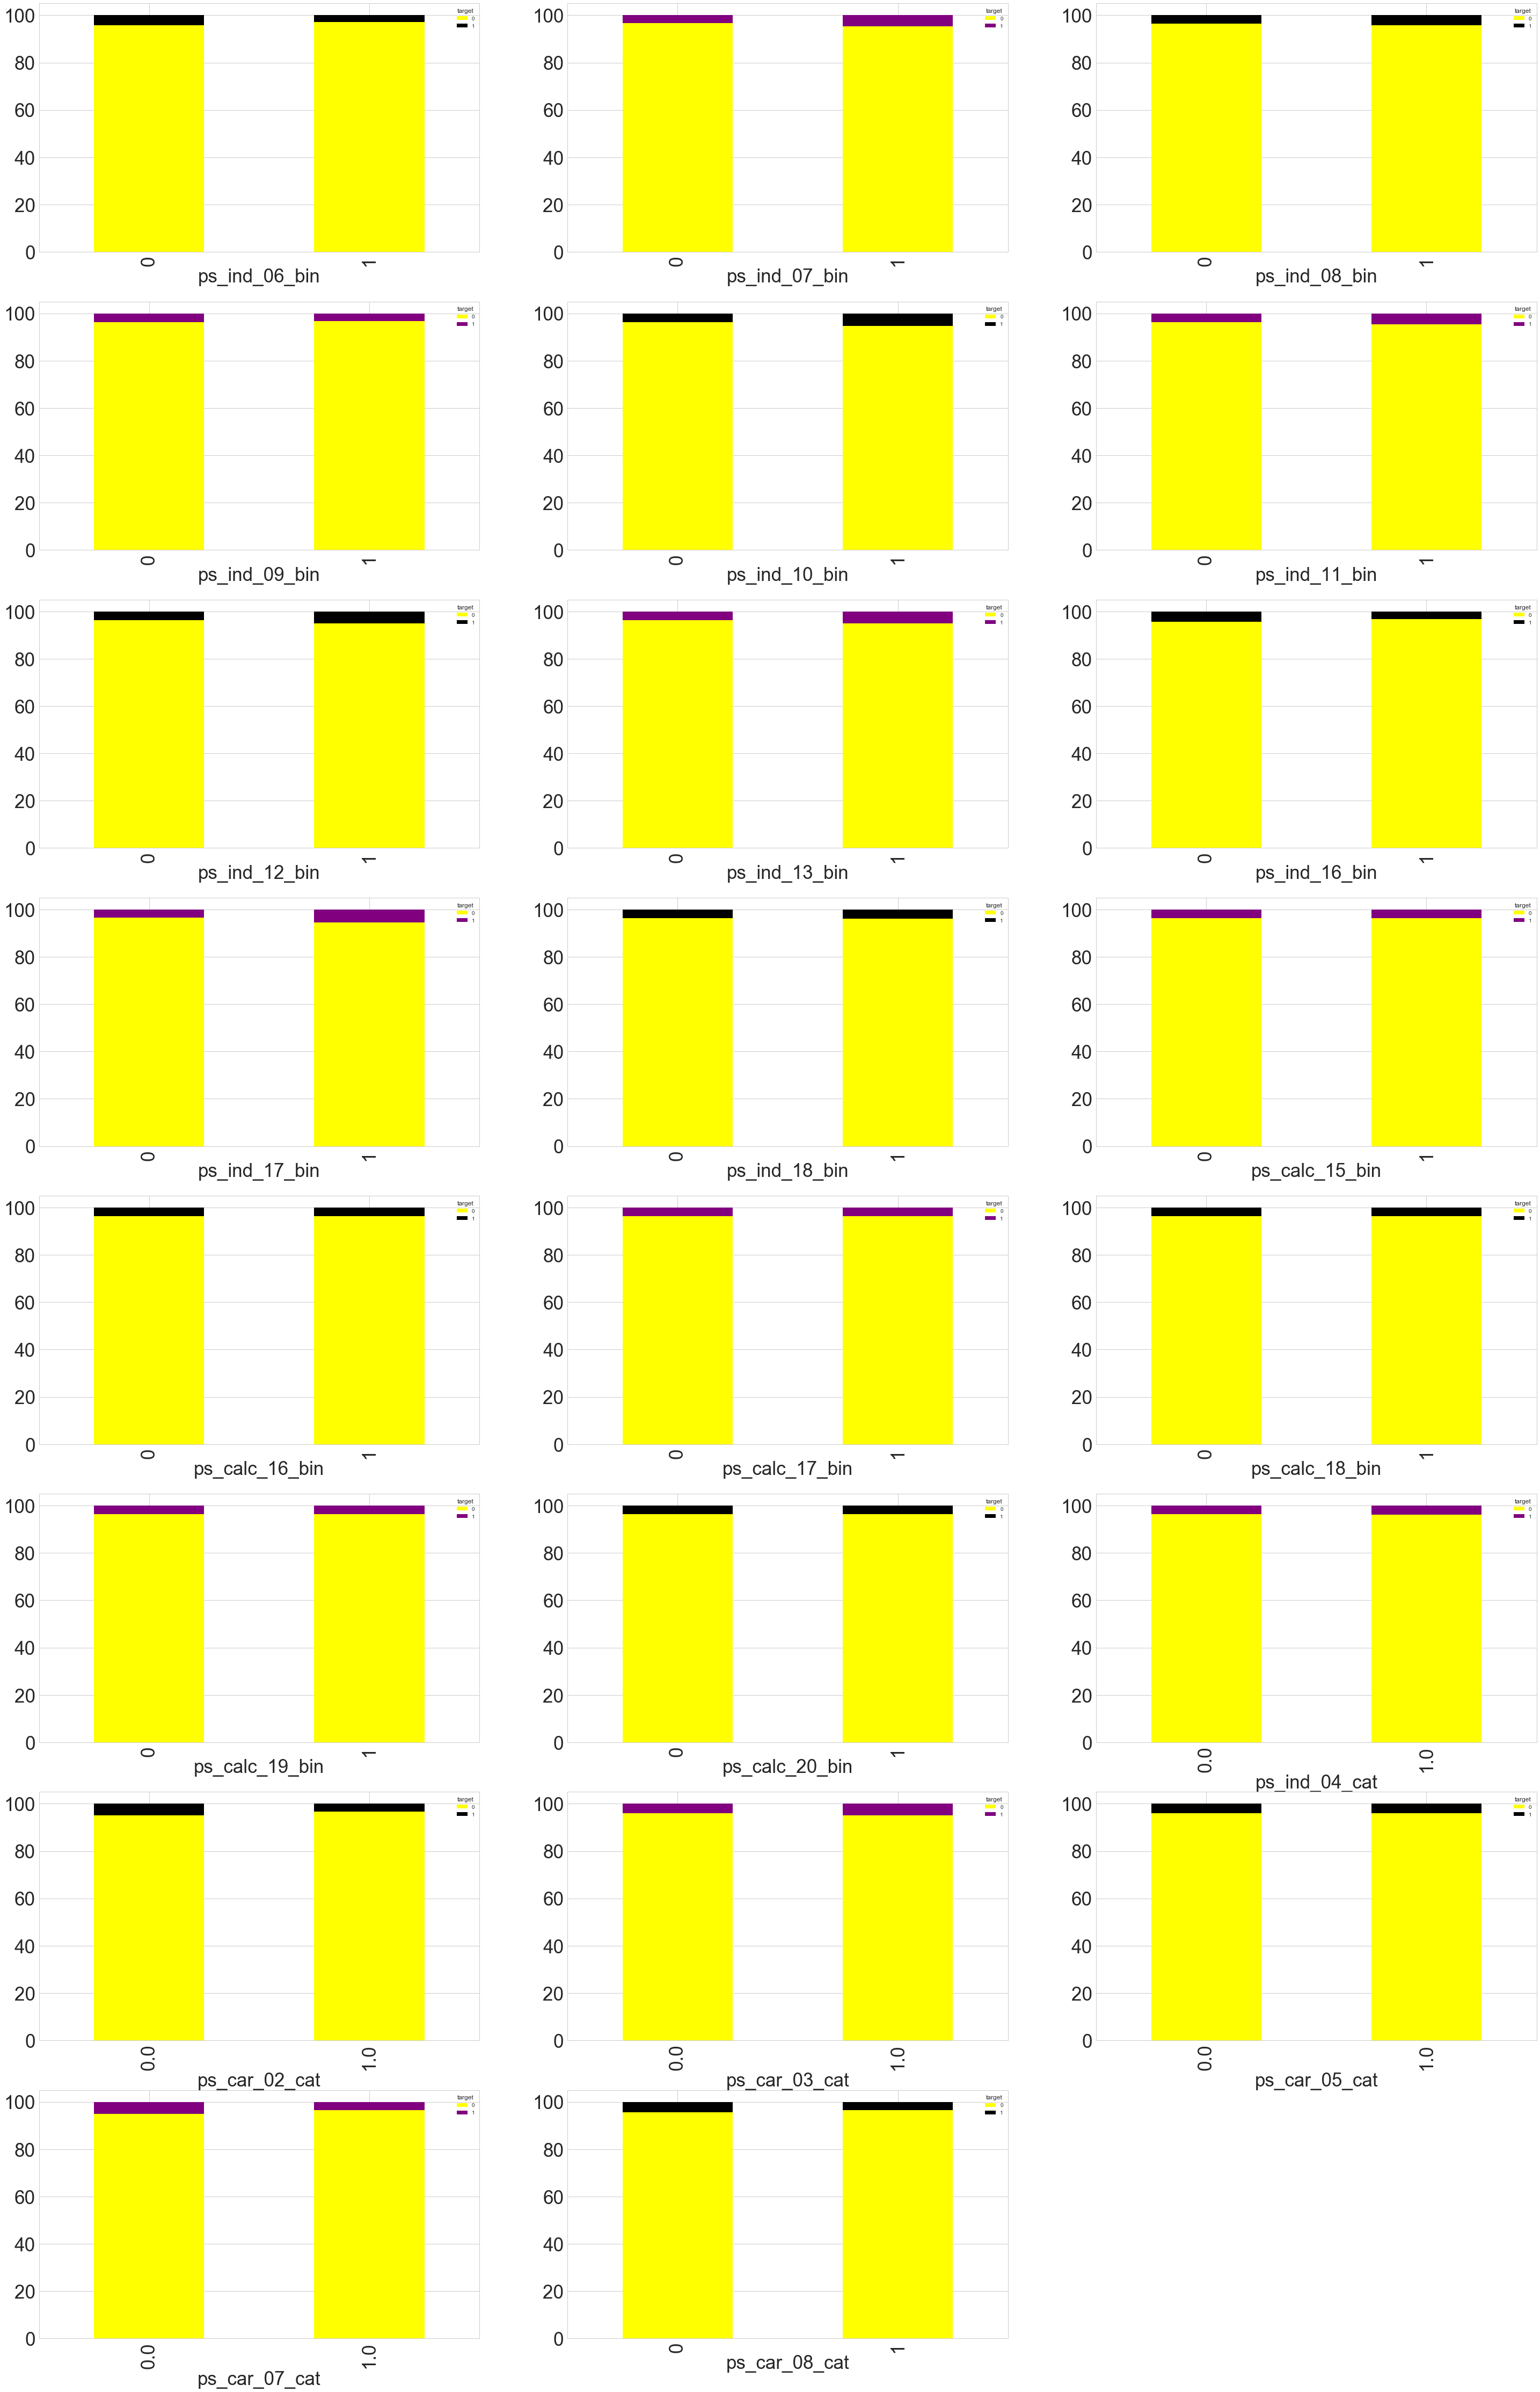

In [50]:
fig=plt.figure(figsize=(50,80))
count=[]
for i, plot_vars in enumerate(binary):
    ax=fig.add_subplot(8,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(drivers[plot_vars],drivers["target"]).apply(lambda r: r/r.sum()*100, axis=1)
    if i%2==0:
        counts.plot.bar(color=["yellow",'black'],stacked=True,ax=ax)
    else:
        counts.plot.bar(color=["yellow",'purple'],stacked=True,ax=ax)
    count.append(counts)
plt.show()

We can see that some variables have different number of claims across levels and some are not.
As an example ps_car_02_cat has more drivers making claim at the category 0, then in category 1. However, for ps_calc_20_bin number of claims from drivers doesn't vary much across categories.

Let's print the tables to see how much amount of claims varies across levels of variables.
For this work was used code from here:
https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side by Yasin Zähringer

In [51]:
from IPython.display import display,HTML

def multi_column_df_display(list_dfs, cols=3):
    html_table = "<table style='width:100%; border:0px'>{content}</table>"
    html_row = "<tr style='border:0px'>{content}</tr>"
    html_cell = "<td style='width:{width}%;vertical-align:top;border:0px'>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)

    cells = [ html_cell.format(content=df.to_html()) for df in list_dfs ]
    cells += (cols - (len(list_dfs)%cols)) * [html_cell.format(content="")] # pad
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    display(HTML(html_table.format(content="".join(rows))))


multi_column_df_display(count)

target,0,1
ps_ind_06_bin,,
0,95.841508,4.158492
1,97.146271,2.853729
target,0,1
ps_ind_07_bin,,
0,96.732418,3.267582
1,95.265019,4.734981
target,0,1
ps_ind_08_bin,,
0,96.464340,3.535660


From this tables we can see that this variables have variation in submitted claims to insurance companies and supposedly are usefull:
ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_ind_04_cat, ps_car_02_cat, ps_car_03_cat, ps_car_07_cat, ps_car_08_cat

This variables don't have much variation across levels and supposedly aren't usefull:

ps_ind_09_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin, ps_calc_15_bin, ps_car_05_cat

Variables ps_car_03_cat, ps_car_05_cat, ps_car_07_cat contain missing values.

ps_car_03_cat has about 69.1% of missing values, ps_car_05_cat - has about 44.78% of missing values, ps_ind_04_cat - has about 0.014% missing values and variable ps_car_07_cat has about 2% of missing values.

Variable ps_car_03_cat has some important variation. Because it has so many missing values we'll create a third category and call it "2" for this variable. And see what kind of variation it will give us.

We will drop variable ps_car_05_cat. As we can see it has values across categories slightly above average for insurance claims, but it can be only because it missing so much data.

Variables ps_car_07_cat and ps_ind_04_cat have not much missing values so we will fill it randomly from non missing values of this variable.

In [52]:
#drop ps_car_05_cat
drivers.drop('ps_car_05_cat',axis=1, inplace = True)
drivers["ps_car_03_cat"]=drivers["ps_car_03_cat"].fillna(2)

target,0,1
ps_car_03_cat,,
0.0,96.046239,3.953761
1.0,95.170221,4.829779
2.0,96.729332,3.270668


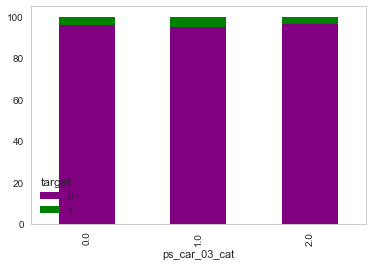

In [53]:
counts=pd.crosstab(drivers['ps_car_03_cat'],drivers["target"]).apply(lambda r: r/r.sum()*100, axis=1)
counts.plot(kind='bar', stacked=True, color=['purple','green'], grid=False)
counts

We can see that the variable has some variation and because we don't know the meaning of this variable we'll leave it in a dataset and decide if we need during feature selection.

In [54]:
drivers['wNaNps_car_07_cat']=drivers["ps_car_07_cat"].dropna()
drivers["ps_car_07_cat"].fillna(np.random.choice(drivers['wNaNps_car_07_cat']),inplace=True)
drivers.drop('wNaNps_car_07_cat',axis=1, inplace = True)
drivers['wNaNps_ind_04_cat']=drivers["ps_ind_04_cat"].dropna()
drivers["ps_ind_04_cat"].fillna(np.random.choice(drivers['wNaNps_ind_04_cat']),inplace=True)
drivers.drop('wNaNps_ind_04_cat',axis=1, inplace = True)

### Plot categorical nominal variables

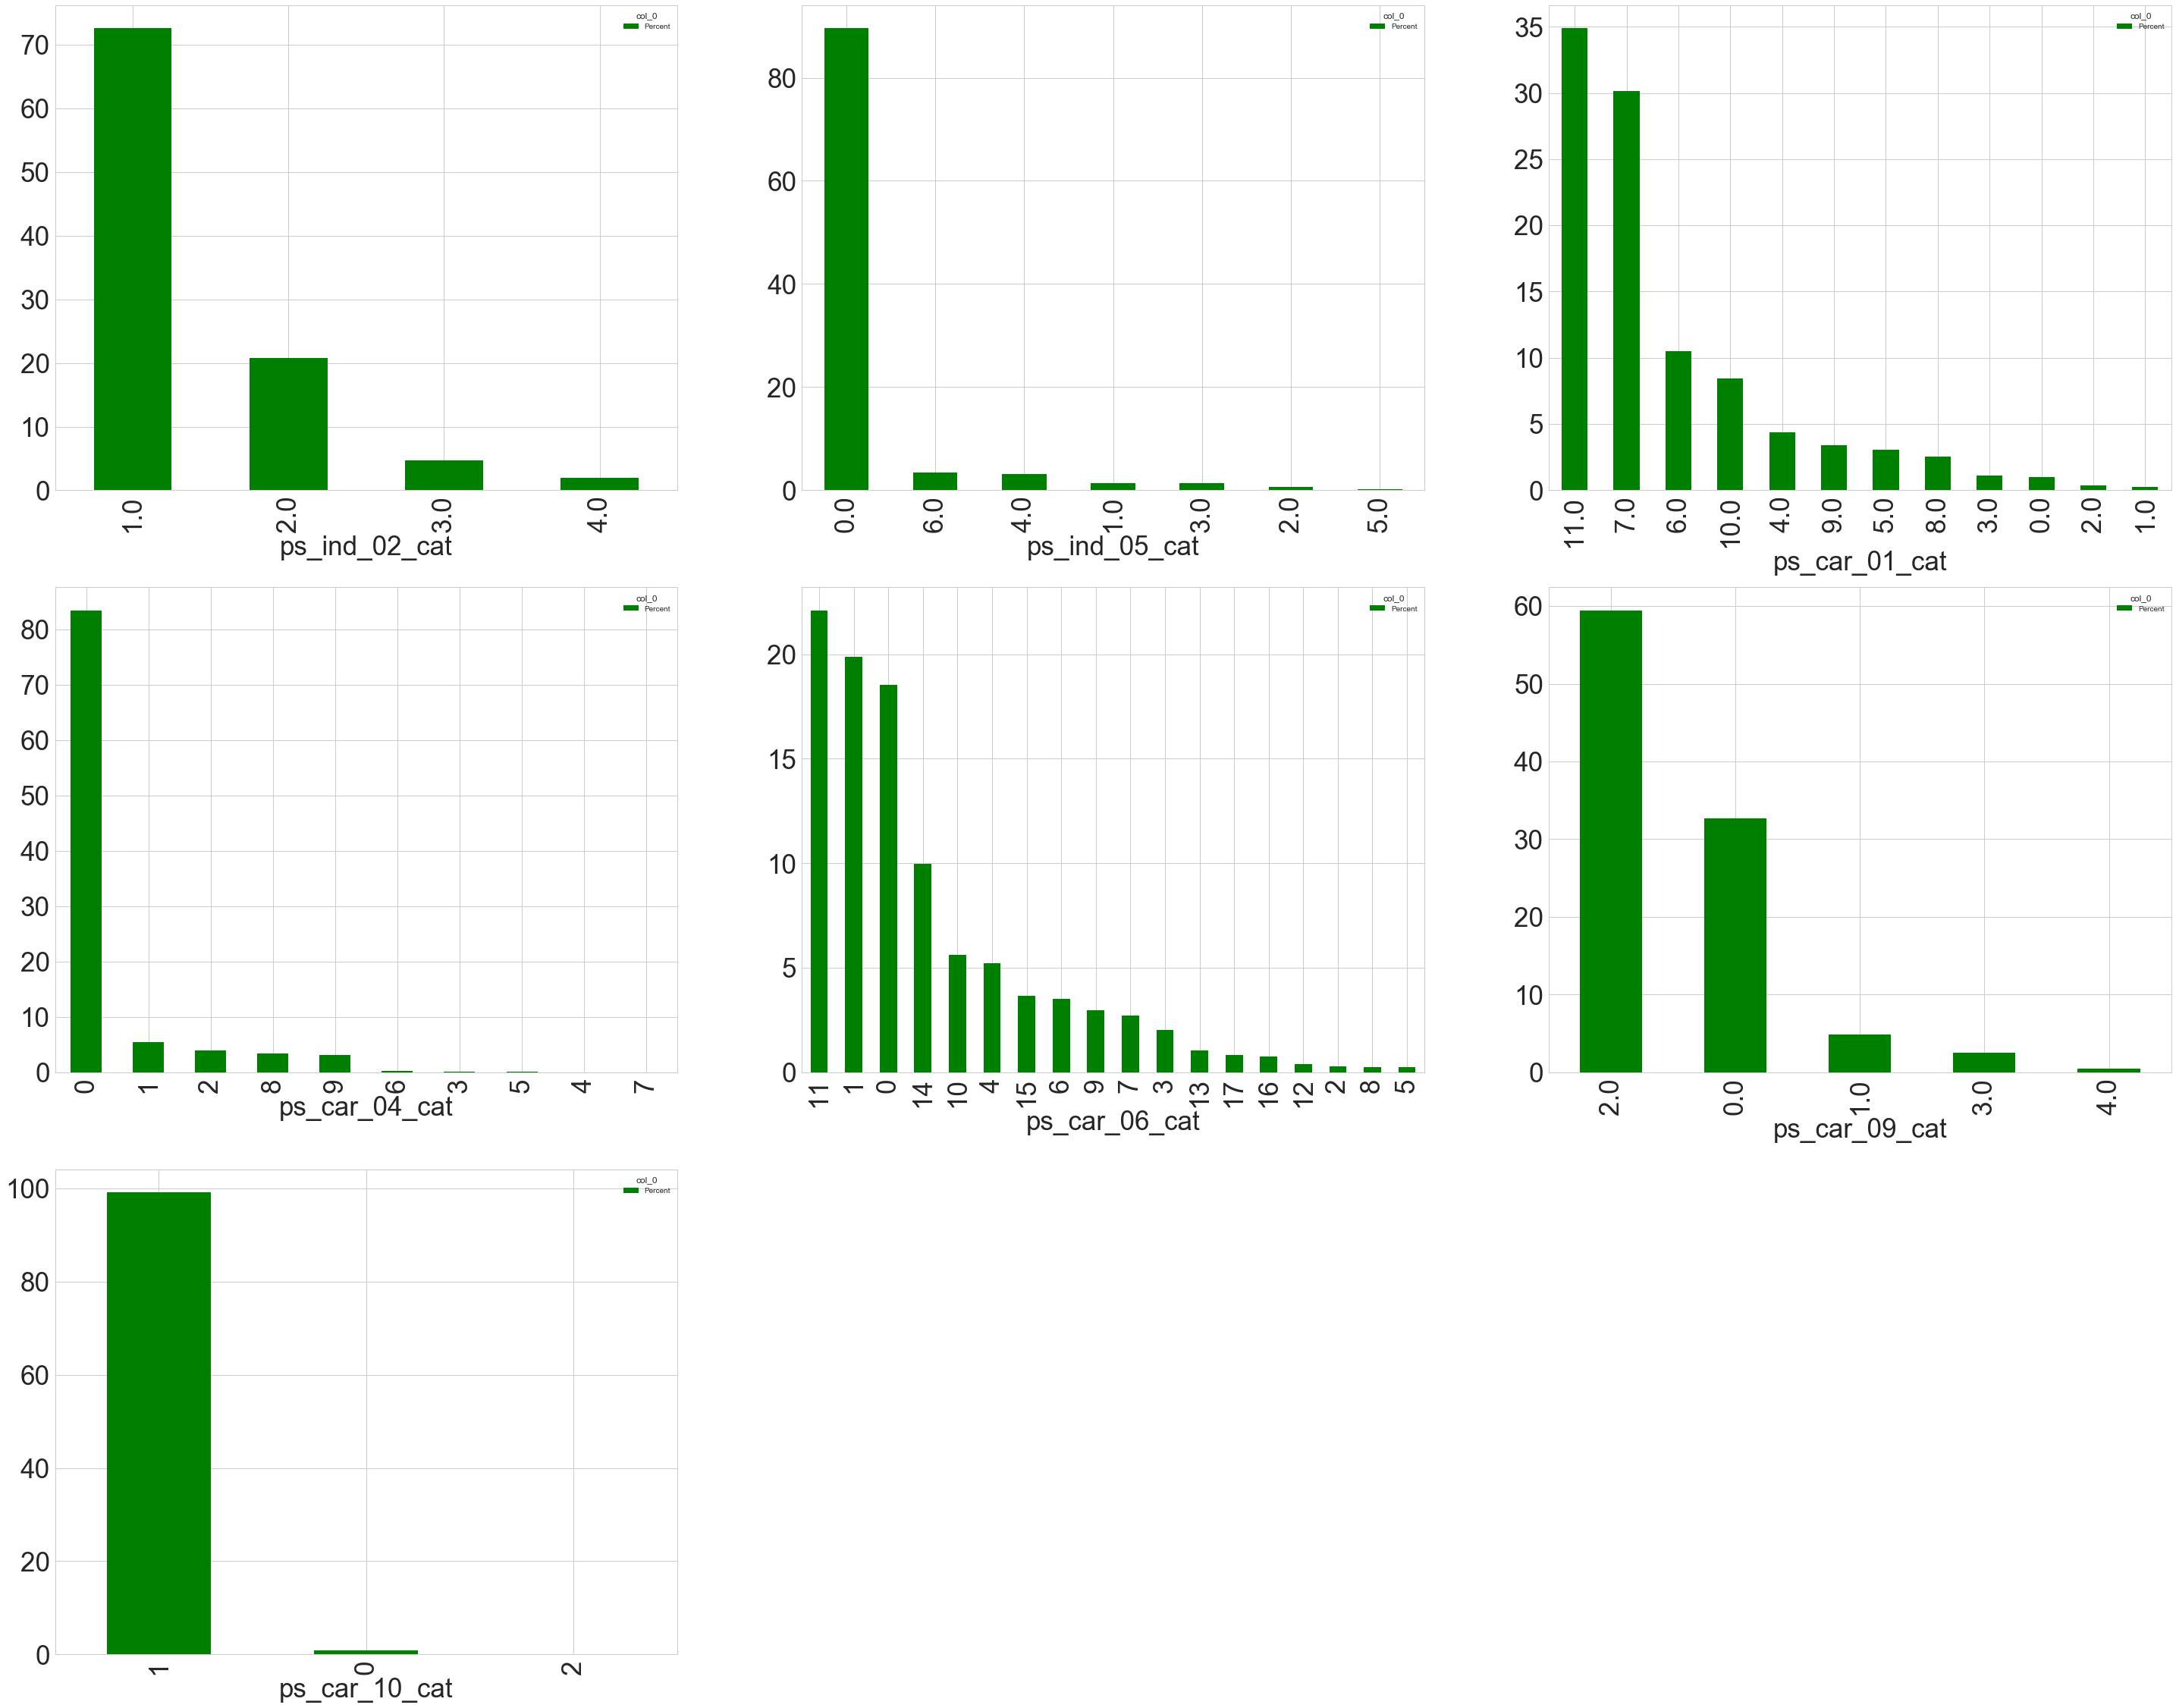

In [56]:
#plot nominal variables
cat=["ps_ind_02_cat", "ps_ind_05_cat", "ps_car_01_cat", "ps_car_04_cat", "ps_car_06_cat", "ps_car_09_cat", 
     "ps_car_10_cat"]
fig=plt.figure(figsize=(50,40))
for i, plot_vars in enumerate(cat):
    ax=fig.add_subplot(3,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(index=drivers[plot_vars], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
    counts.plot.bar(color="green",ax=ax)

plt.show()

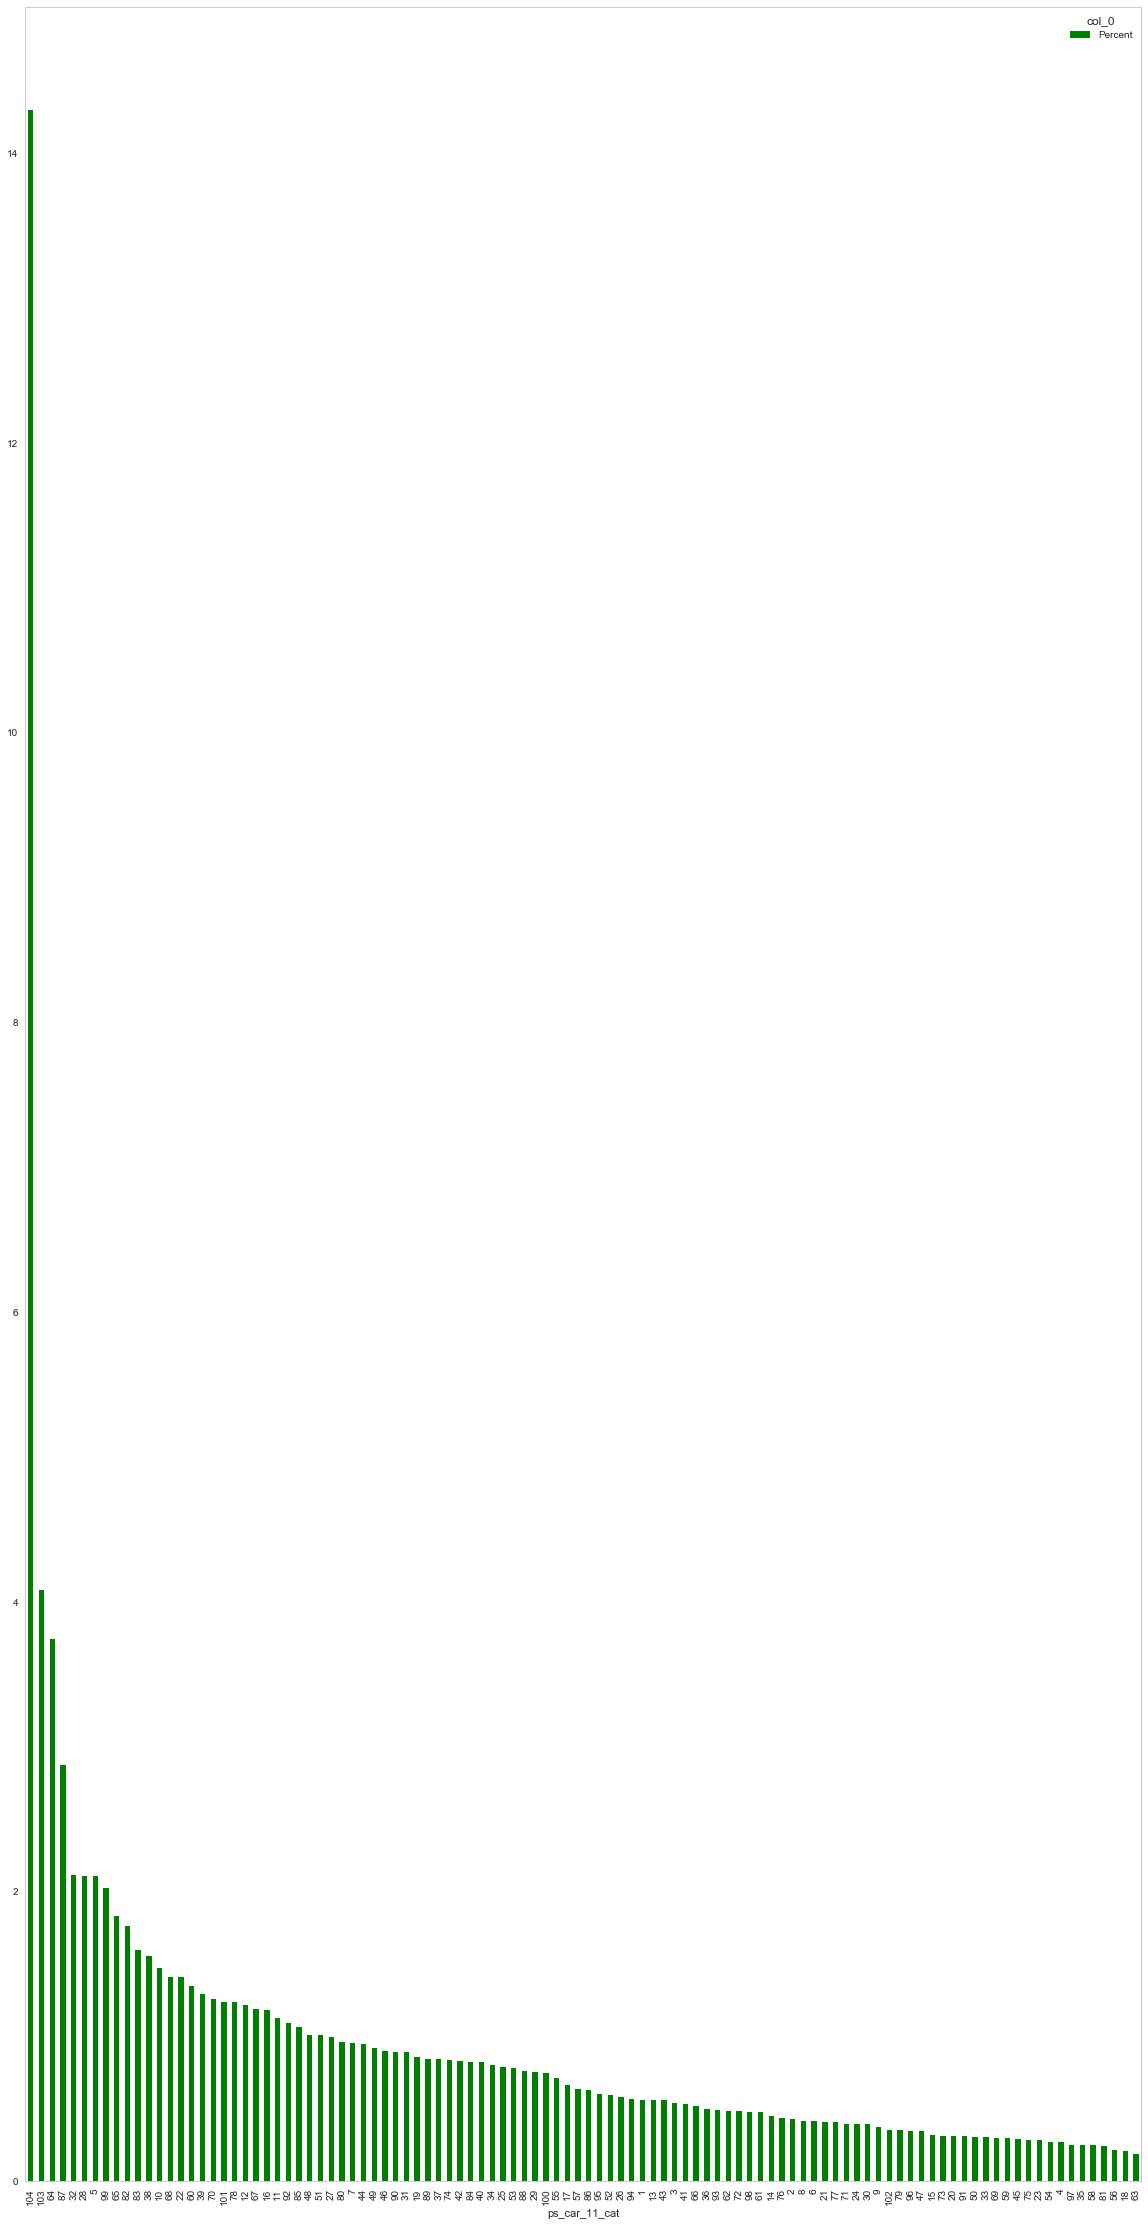

In [58]:
counts=pd.crosstab(index=drivers['ps_car_11_cat'], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
counts.plot(kind='bar', stacked=True, color=['green'], grid=False,figsize=(20,40))

We can see that most of categorical variables are highly unbalanced. ps_car_11_cat has enormous amount of levels.

Now, let's have a look at variation of target variable across categories of these variables.

We can see that this variable has 13 categories. With majority of records (10%) in category 7 and minority in category 1 (2%). But this is not heavely unbalanced.
Let's have a look how target variable varies across categories.

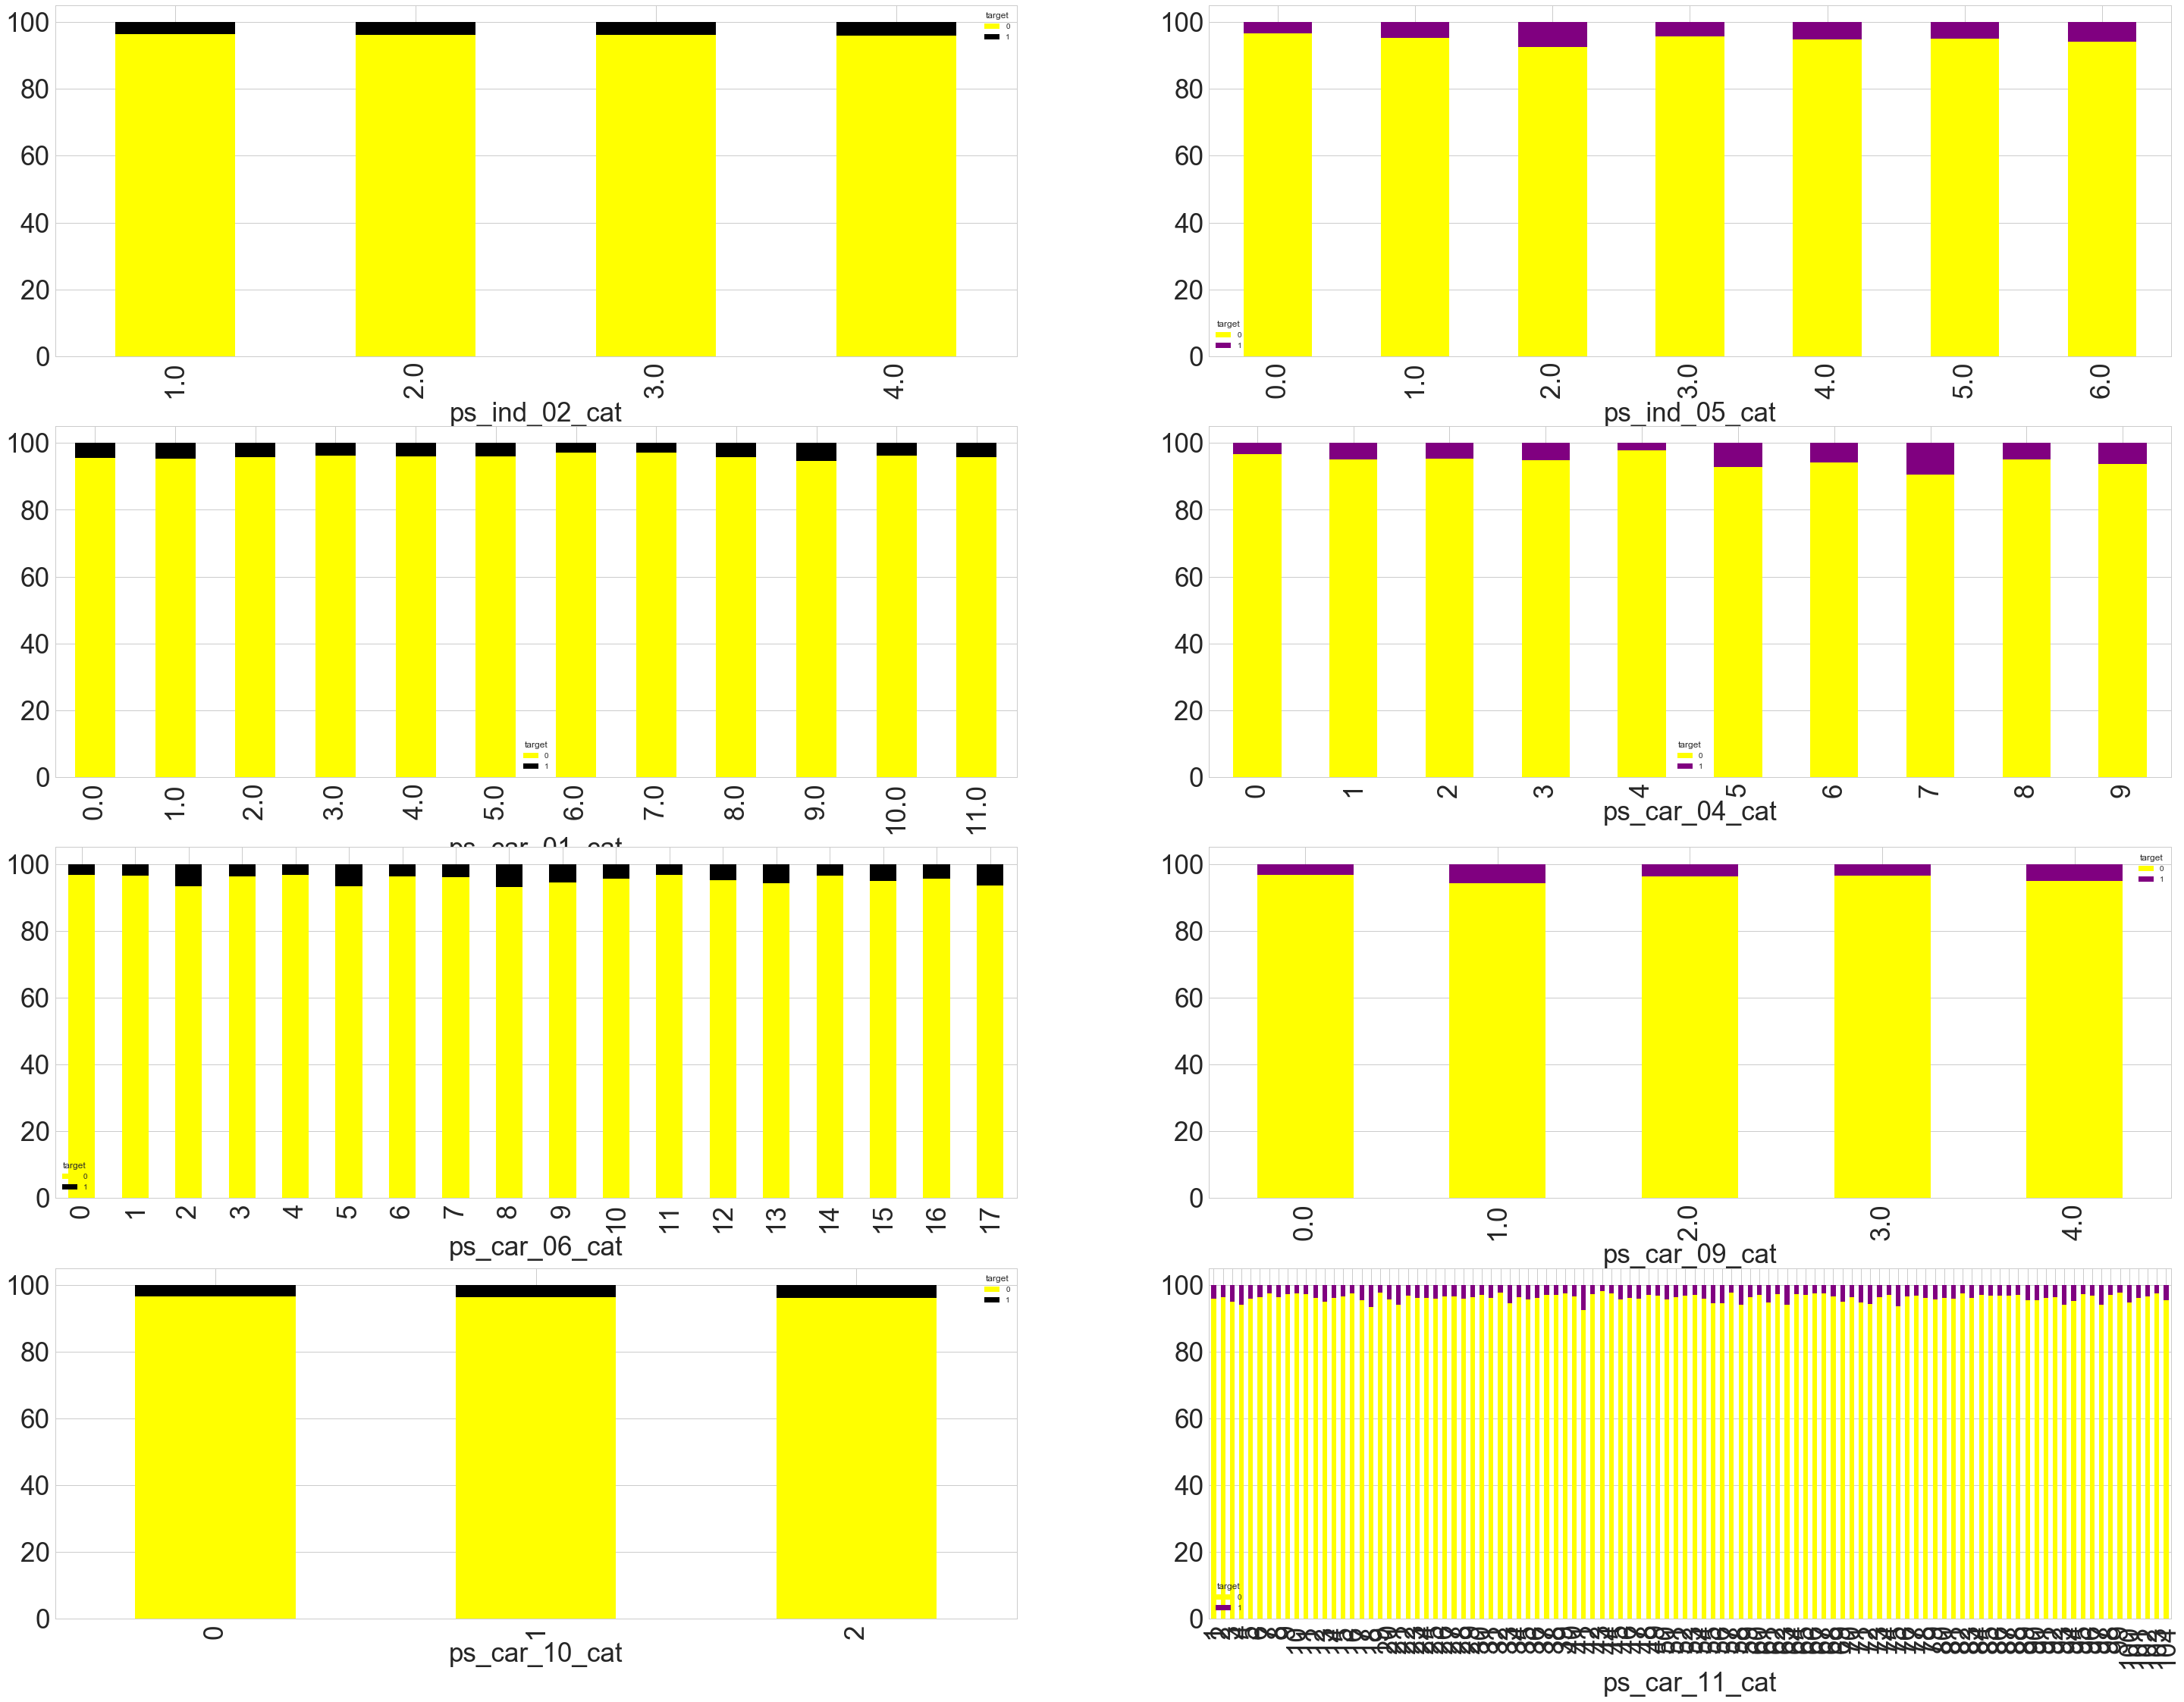

In [59]:
cat2=["ps_ind_02_cat", "ps_ind_05_cat", "ps_car_01_cat", "ps_car_04_cat", "ps_car_06_cat", "ps_car_09_cat", 
     "ps_car_10_cat","ps_car_11_cat"]
fig=plt.figure(figsize=(50,80))
count=[]
for i, plot_vars in enumerate(cat2):
    ax=fig.add_subplot(8,2,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(drivers[plot_vars],drivers["target"]).apply(lambda r: r/r.sum()*100, axis=1)
    if i%2==0:
        counts.plot.bar(color=["yellow",'black'],stacked=True,ax=ax)
    else:
        counts.plot.bar(color=["yellow",'purple'],stacked=True,ax=ax)
    count.append(counts)
plt.show()

In [60]:
multi_column_df_display(count)

target,0,1
ps_ind_02_cat,,
1.0,96.427538,3.572462
2.0,96.186060,3.813940
3.0,96.278294,3.721706
4.0,95.921955,4.078045
target,0,1
ps_ind_05_cat,,
0.0,96.613505,3.386495
1.0,95.217496,4.782504
2.0,92.447419,7.552581


We can see that most of the nominal categorical variables can turn out useful except ps_car_10_cat which doesn't have much variation.

Following variables have small percentage of missing values:

ps_car_09_cat, ps_car_02_cat, ps_car_01_cat, ps_ind_05_cat, ps_ind_02_cat

We will replace them with the most frequent category.

In [61]:
imp=Imputer(missing_values="NaN", strategy="most_frequent")
imp.fit(drivers[["ps_car_09_cat"]])
drivers["ps_car_09_cat"]=imp.transform(drivers[["ps_car_09_cat"]]).ravel()
imp.fit(drivers[["ps_car_02_cat"]])
drivers["ps_car_02_cat"]=imp.transform(drivers[["ps_car_02_cat"]]).ravel()
imp.fit(drivers[["ps_car_01_cat"]])
drivers["ps_car_01_cat"]=imp.transform(drivers[["ps_car_01_cat"]]).ravel()
imp.fit(drivers[["ps_ind_05_cat"]])
drivers["ps_ind_05_cat"]=imp.transform(drivers[["ps_ind_05_cat"]]).ravel()
imp.fit(drivers[["ps_ind_02_cat"]])
drivers["ps_ind_02_cat"]=imp.transform(drivers[["ps_ind_02_cat"]]).ravel()

### Plot ordinal variables

Because we don't know the nature of those variables, if they have even interval and we will use them in linear models and non-linear ones, we will treat them as categorical.

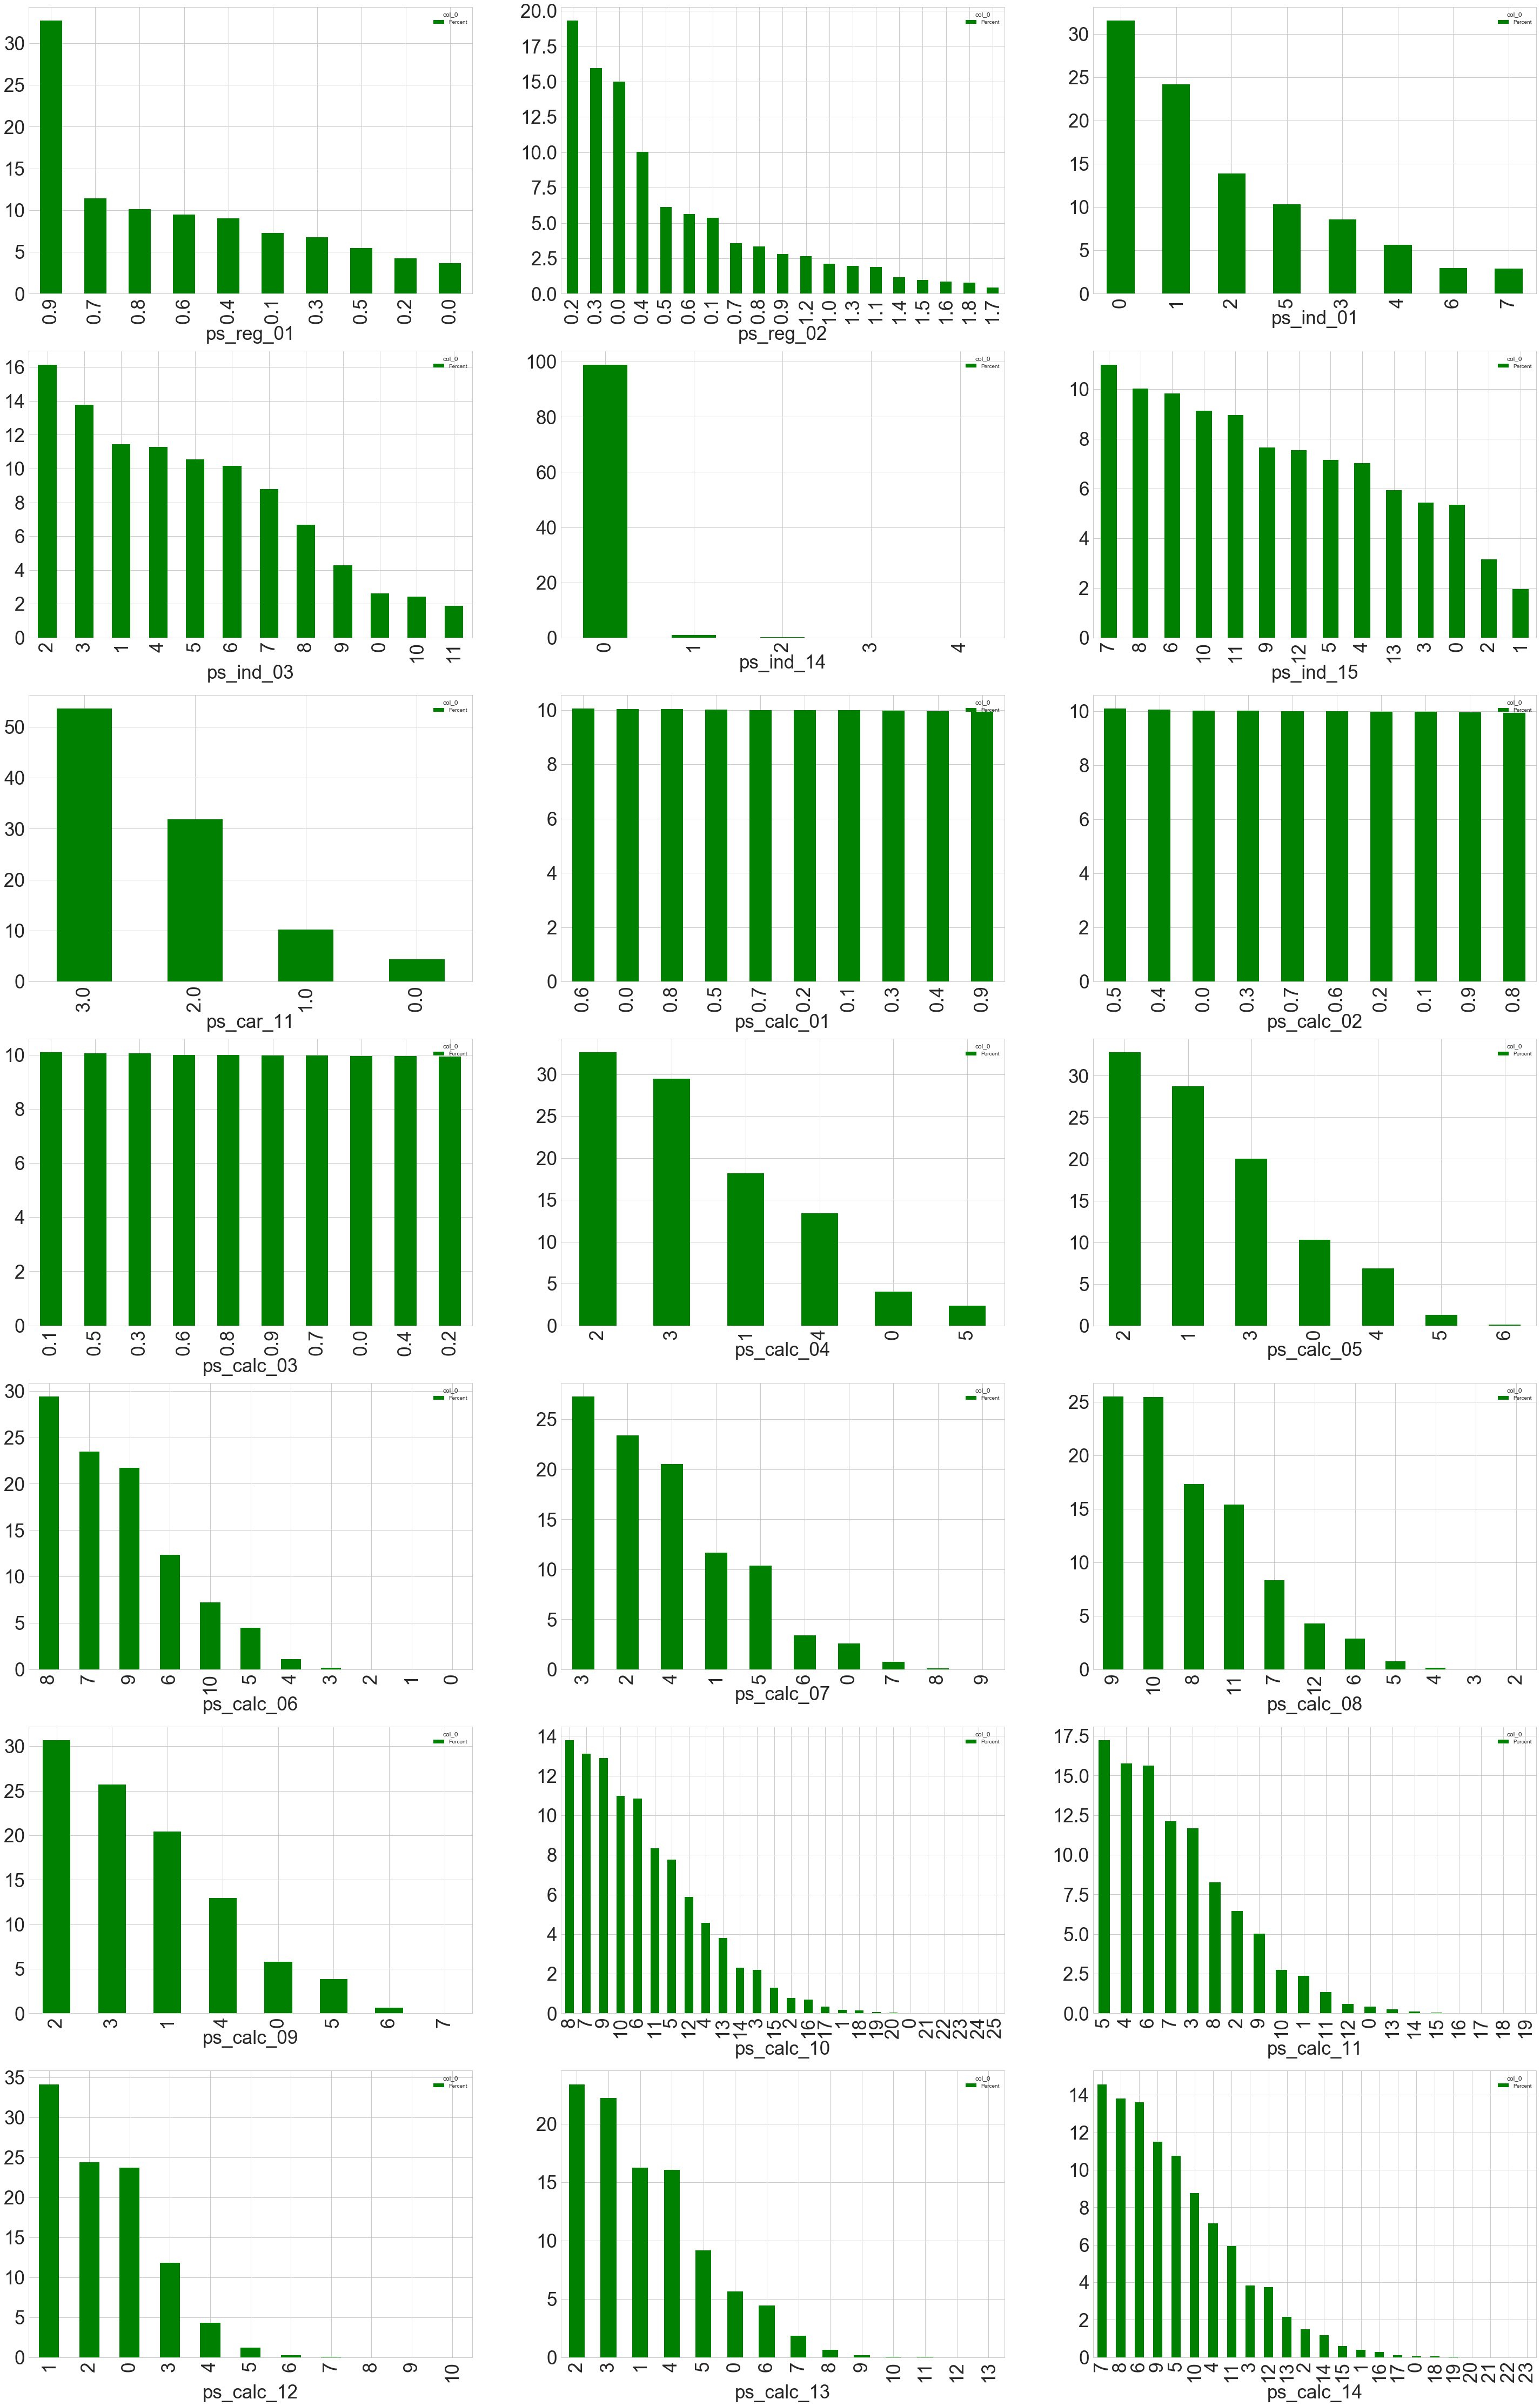

In [63]:
#plot ordinal variables
ordinal=['ps_reg_01', 'ps_reg_02', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_calc_01', 'ps_calc_02',
         'ps_calc_03', 'ps_calc_04','ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 
         'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
fig=plt.figure(figsize=(50,80))
for i, plot_vars in enumerate(ordinal):
    ax=fig.add_subplot(len(ordinal)/3,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(index=drivers[plot_vars], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
    
    counts.plot.bar(color="green",ax=ax)
plt.show()

We can see that some of these variables are balanced and some are highly unbalanced.

Let's have at variation of these variables across the target variable.

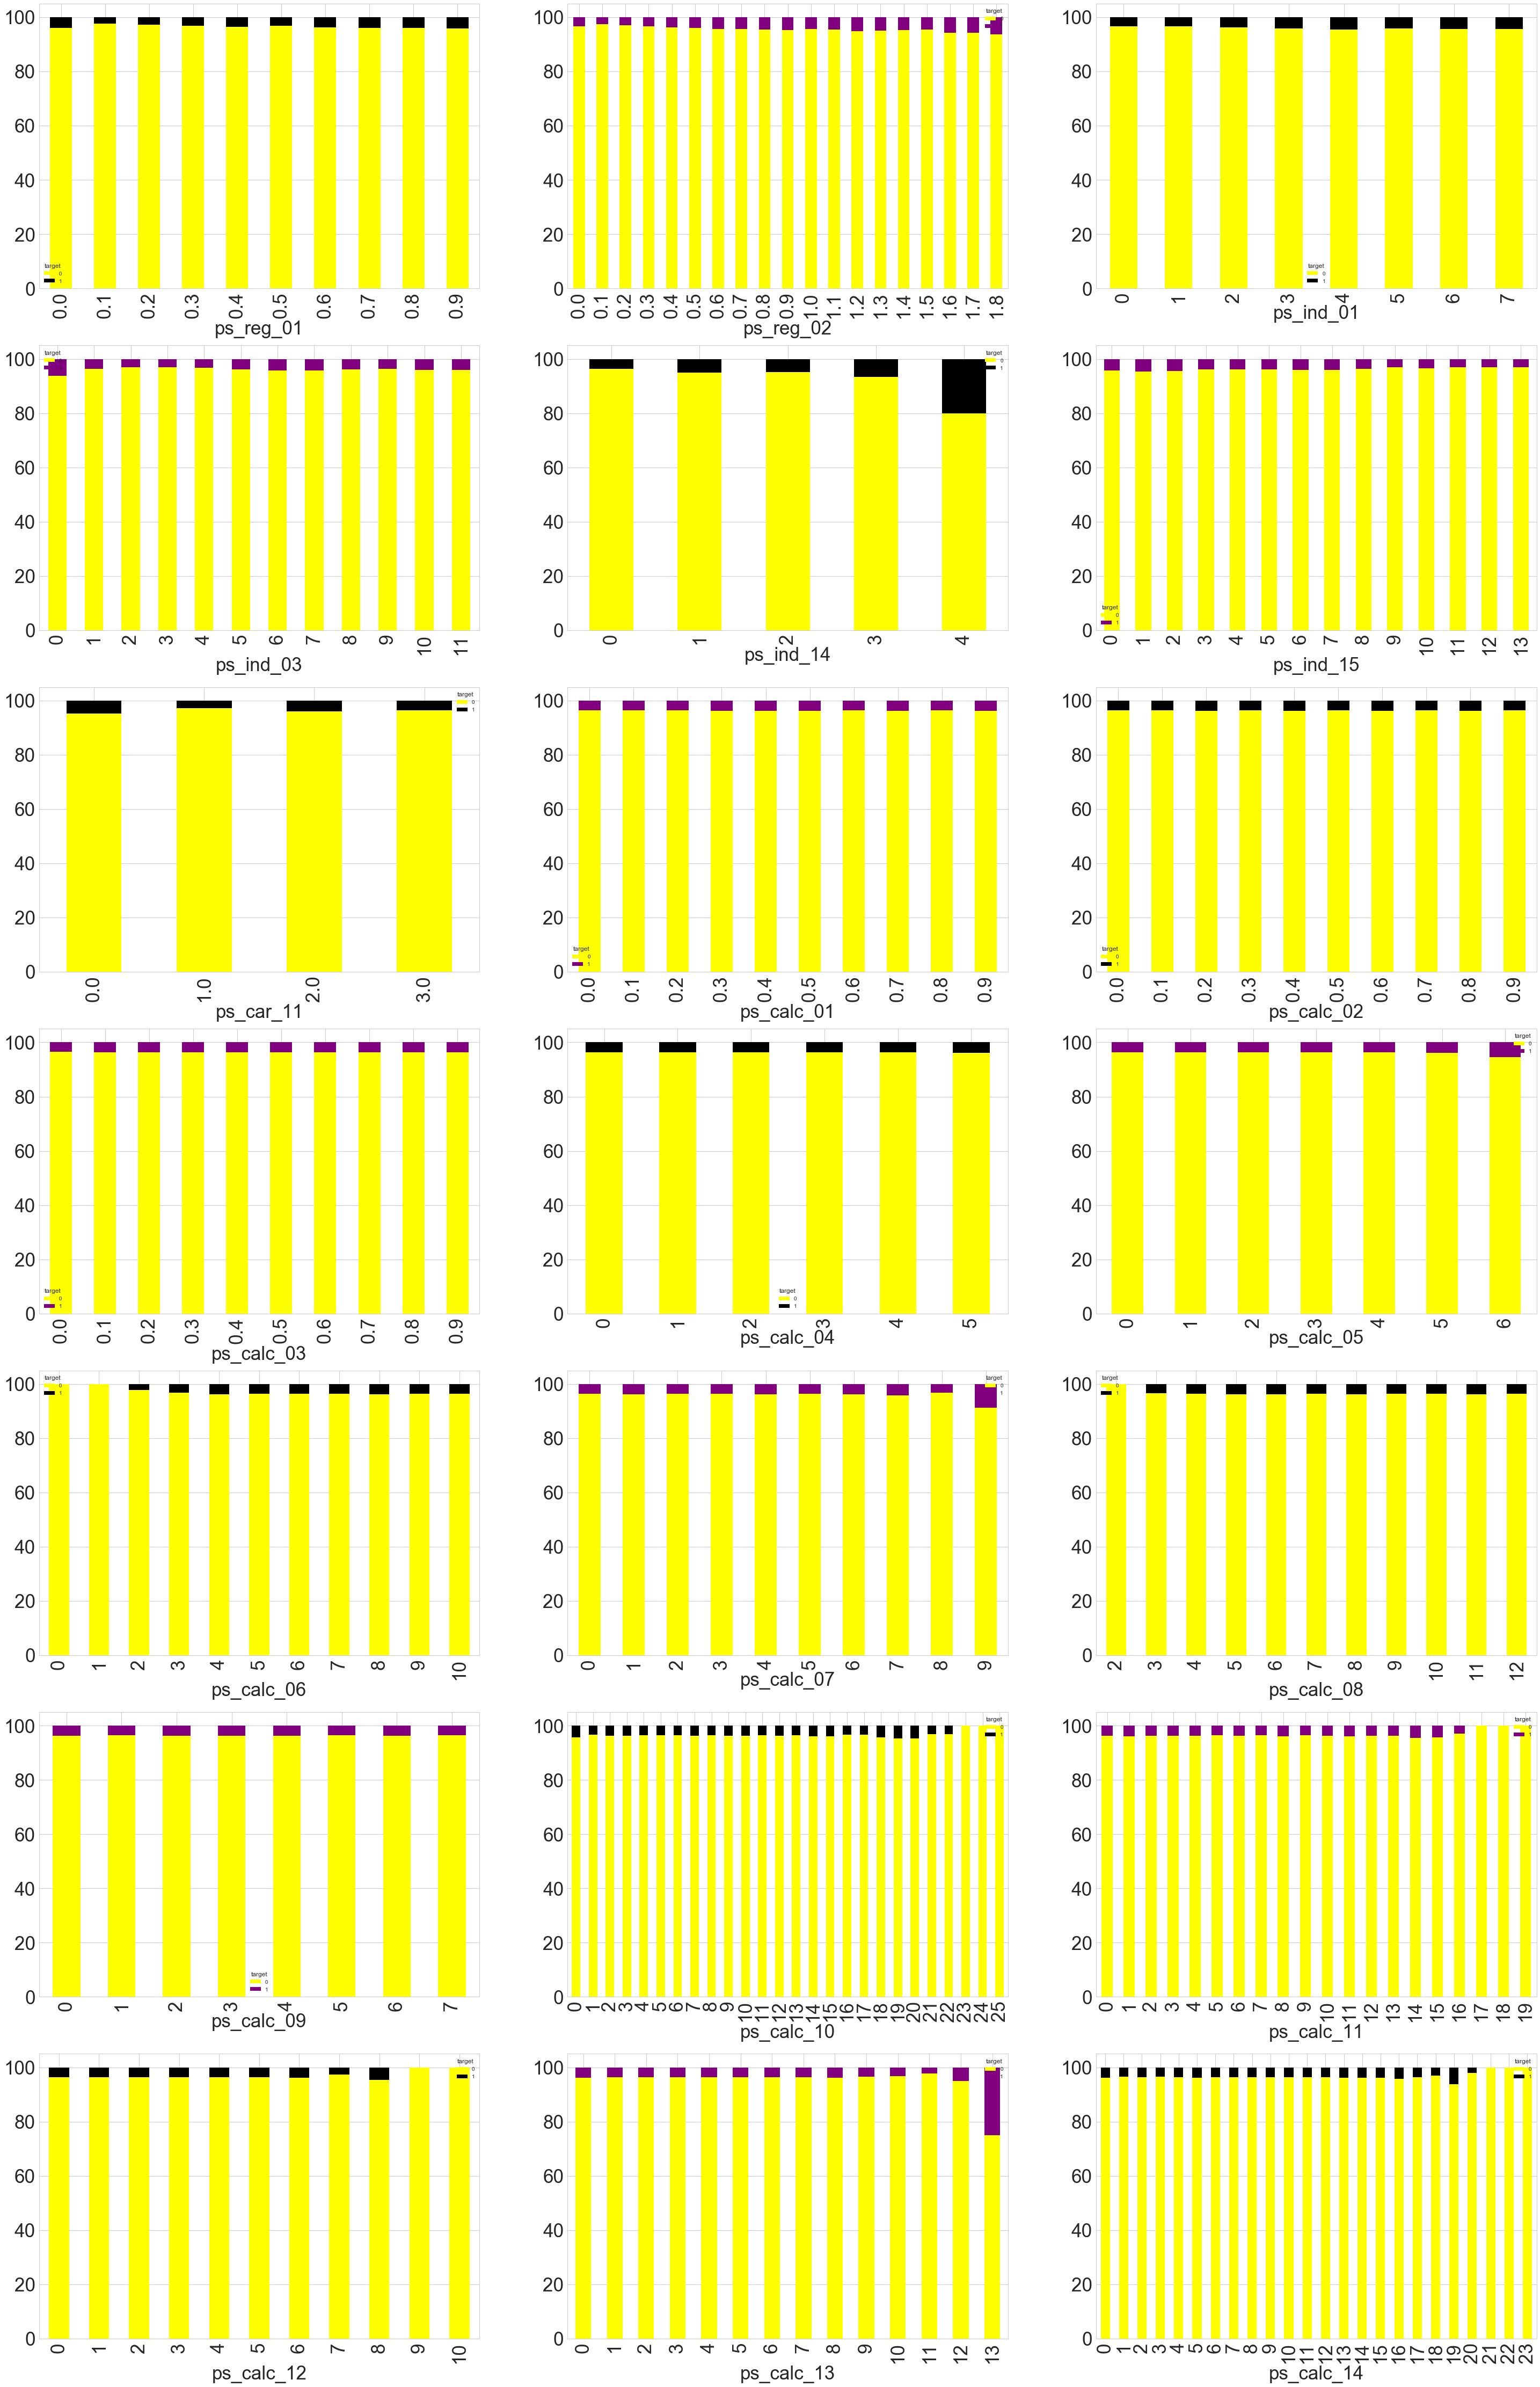

In [64]:
fig=plt.figure(figsize=(50,80))
count=[]
for i, plot_vars in enumerate(ordinal):
    ax=fig.add_subplot(len(ordinal)/3,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    counts=pd.crosstab(drivers[plot_vars],drivers["target"]).apply(lambda r: r/r.sum()*100, axis=1)
    if i%2==0:
        counts.plot.bar(color=["yellow",'black'],stacked=True,ax=ax)
    else:
        counts.plot.bar(color=["yellow",'purple'],stacked=True,ax=ax)
    count.append(counts)
plt.show()

In [65]:
multi_column_df_display(count)

target,0,1
ps_reg_01,,
0.0,96.075085,3.924915
0.1,97.617614,2.382386
0.2,97.268347,2.731653
0.3,96.808141,3.191859
0.4,96.550244,3.449756
0.5,96.883213,3.116787
0.6,96.381772,3.618228
0.7,96.138268,3.861732
0.8,96.144466,3.855534


We can see that some categories have a lot variation in submitted claims. And some variables almost don't have any variation. Such variables are:

ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04,ps_calc_09.

And of course we always should keep in mind that we have a lot of highly unbalanced variables. For this reason we'll use spectial tools to find the most usefull variables for model building.

ps_car_11 has some missing values. We'll replace them with the most frequent category.

In [66]:
imp.fit(drivers[["ps_car_11"]])
drivers["ps_car_11"]=imp.transform(drivers[["ps_car_11"]]).ravel()

In [67]:
ordinal=['ps_reg_01', 'ps_reg_02', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_calc_01', 'ps_calc_02',
         'ps_calc_03', 'ps_calc_04','ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 
         'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']

### Continuous variables

Let's print first few rows of each continuous variable to be sure it is continuous.

In [68]:
contin=['ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']
drivers[contin].head(n=4)

,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,0.718070,0.400000,0.883679,0.370810,3.605551
1,0.766078,0.316228,0.618817,0.388716,2.449490
2,NaN,0.316228,0.641586,0.347275,3.316625
3,0.580948,0.374166,0.542949,0.294958,2.000000


Because now we are sure that this is continuous variables we will plot them.

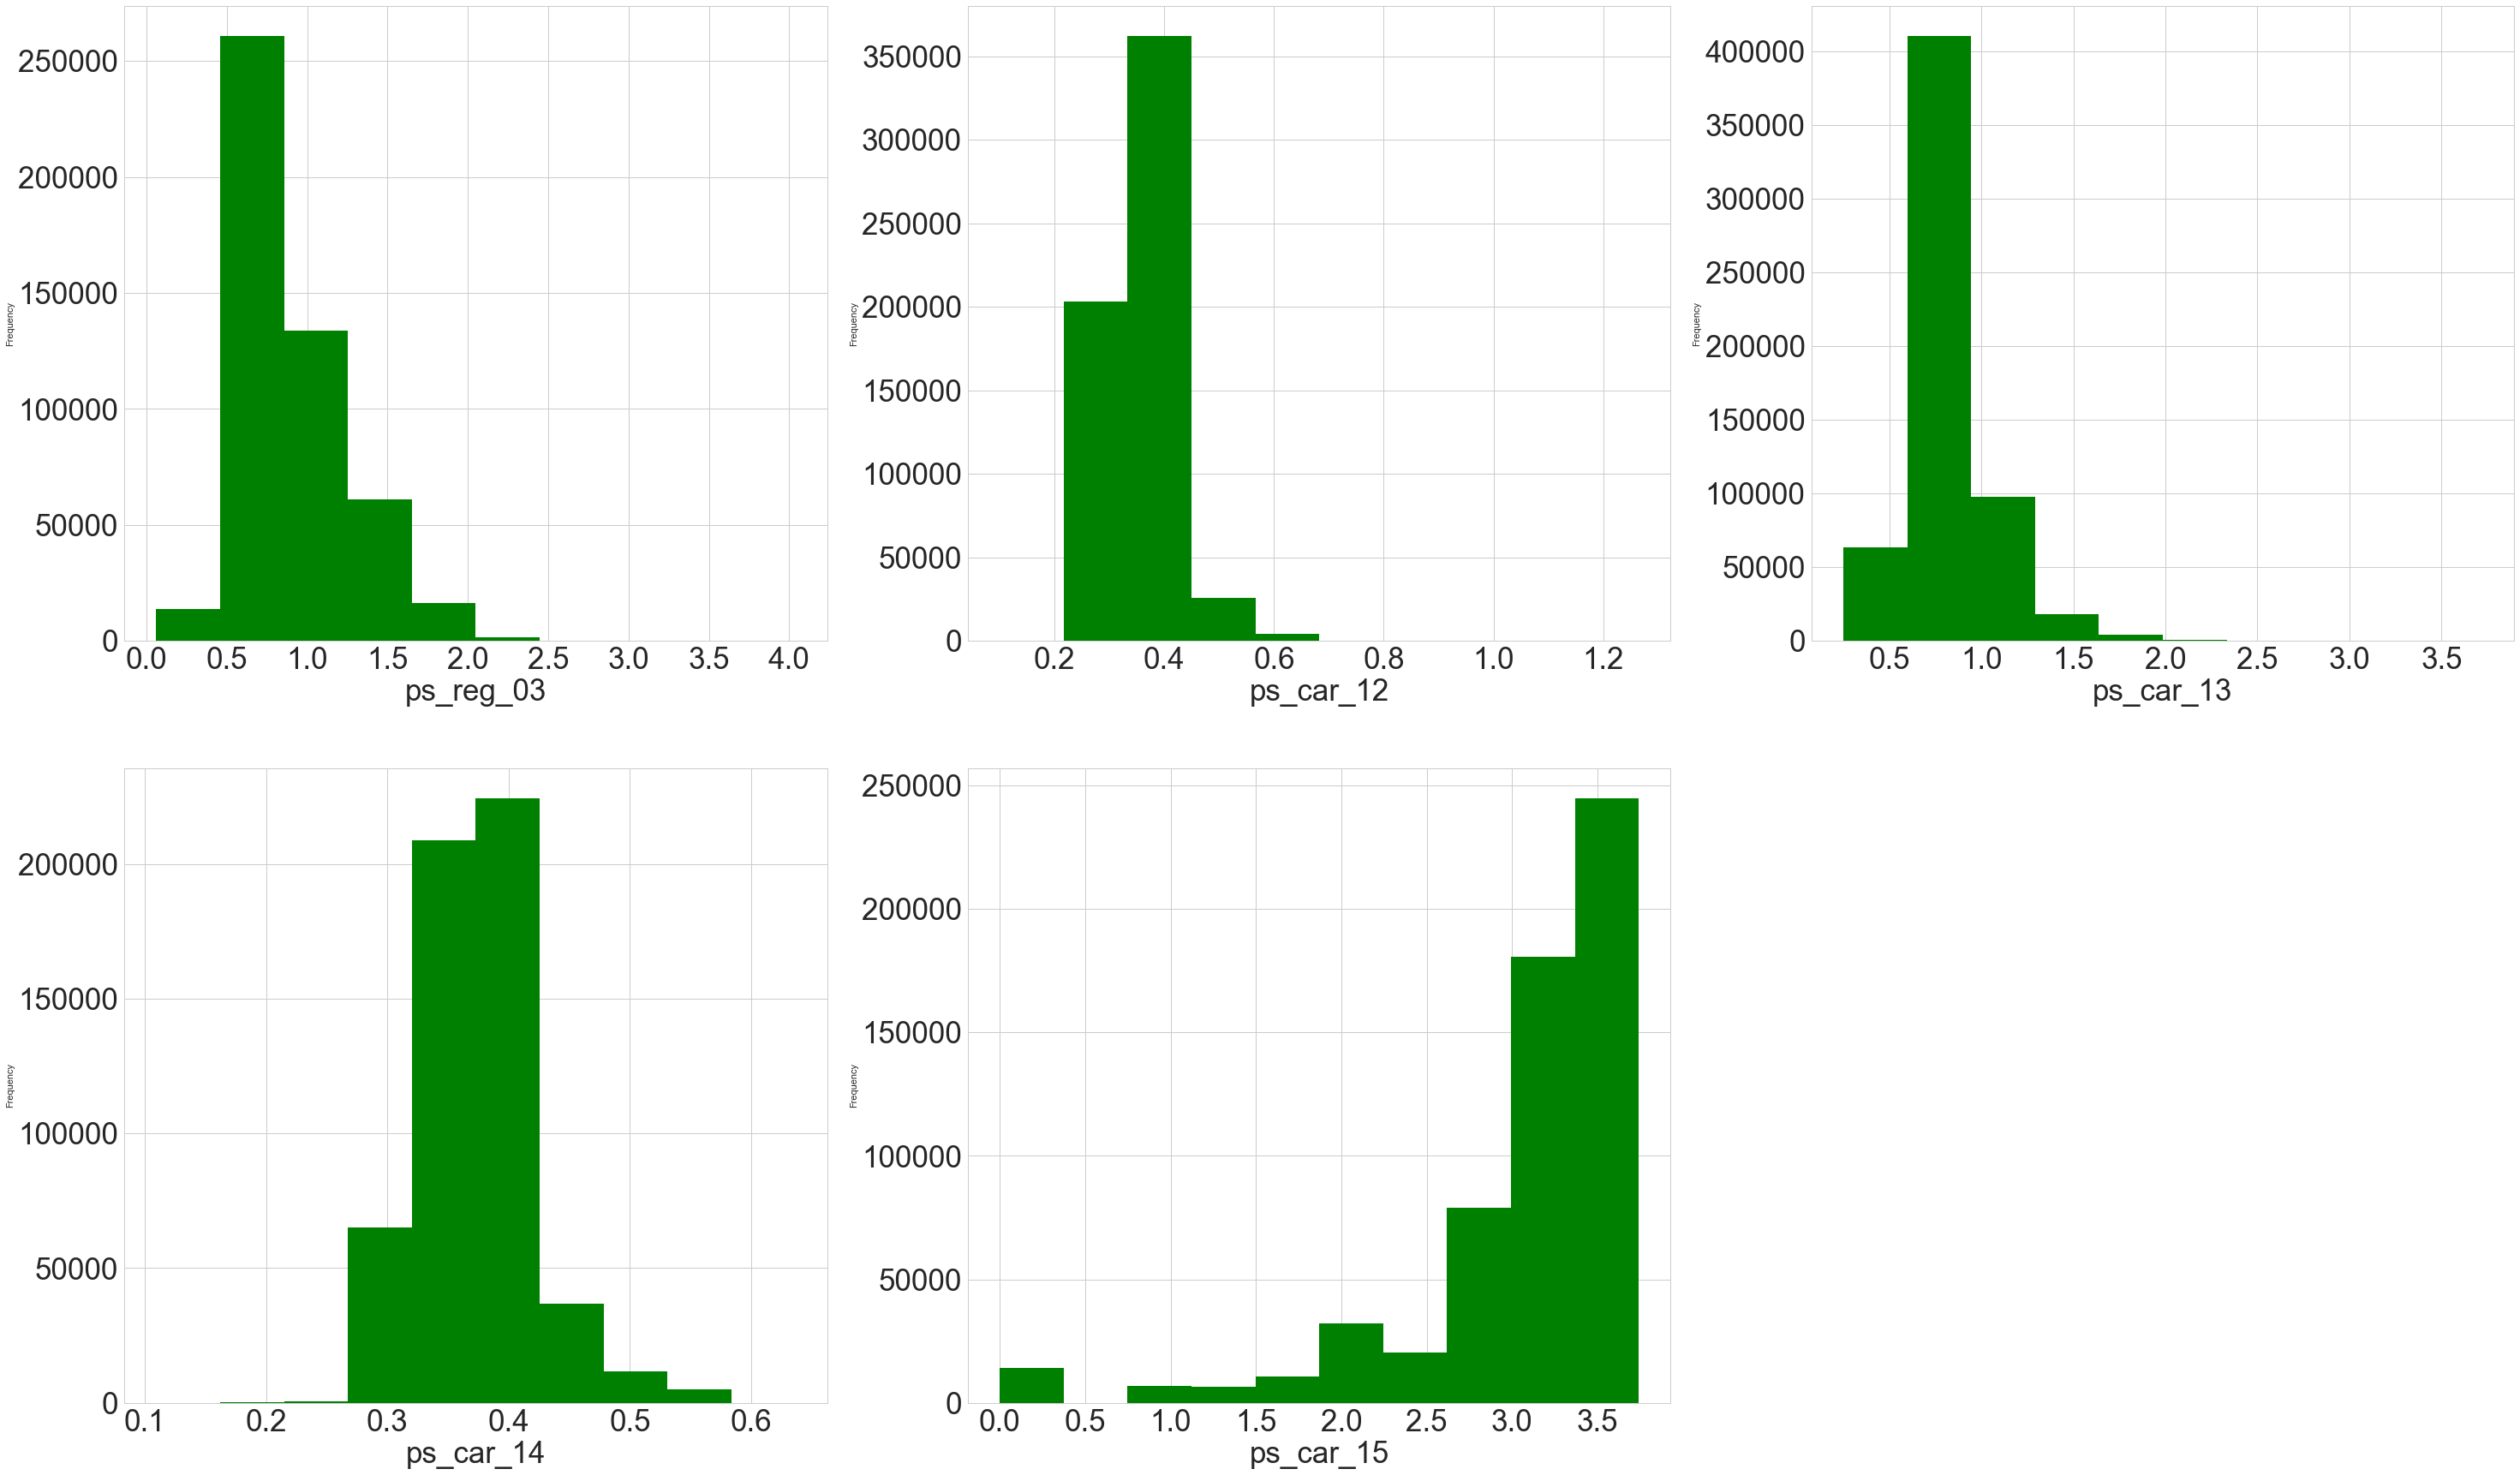

In [70]:
fig=plt.figure(figsize=(50,30))
for i, plot_vars in enumerate(contin):
    ax=fig.add_subplot(2,3,i+1)
    plt.xlabel(plot_vars, fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    drivers[plot_vars].plot.hist(color="green",ax=ax)
plt.show()

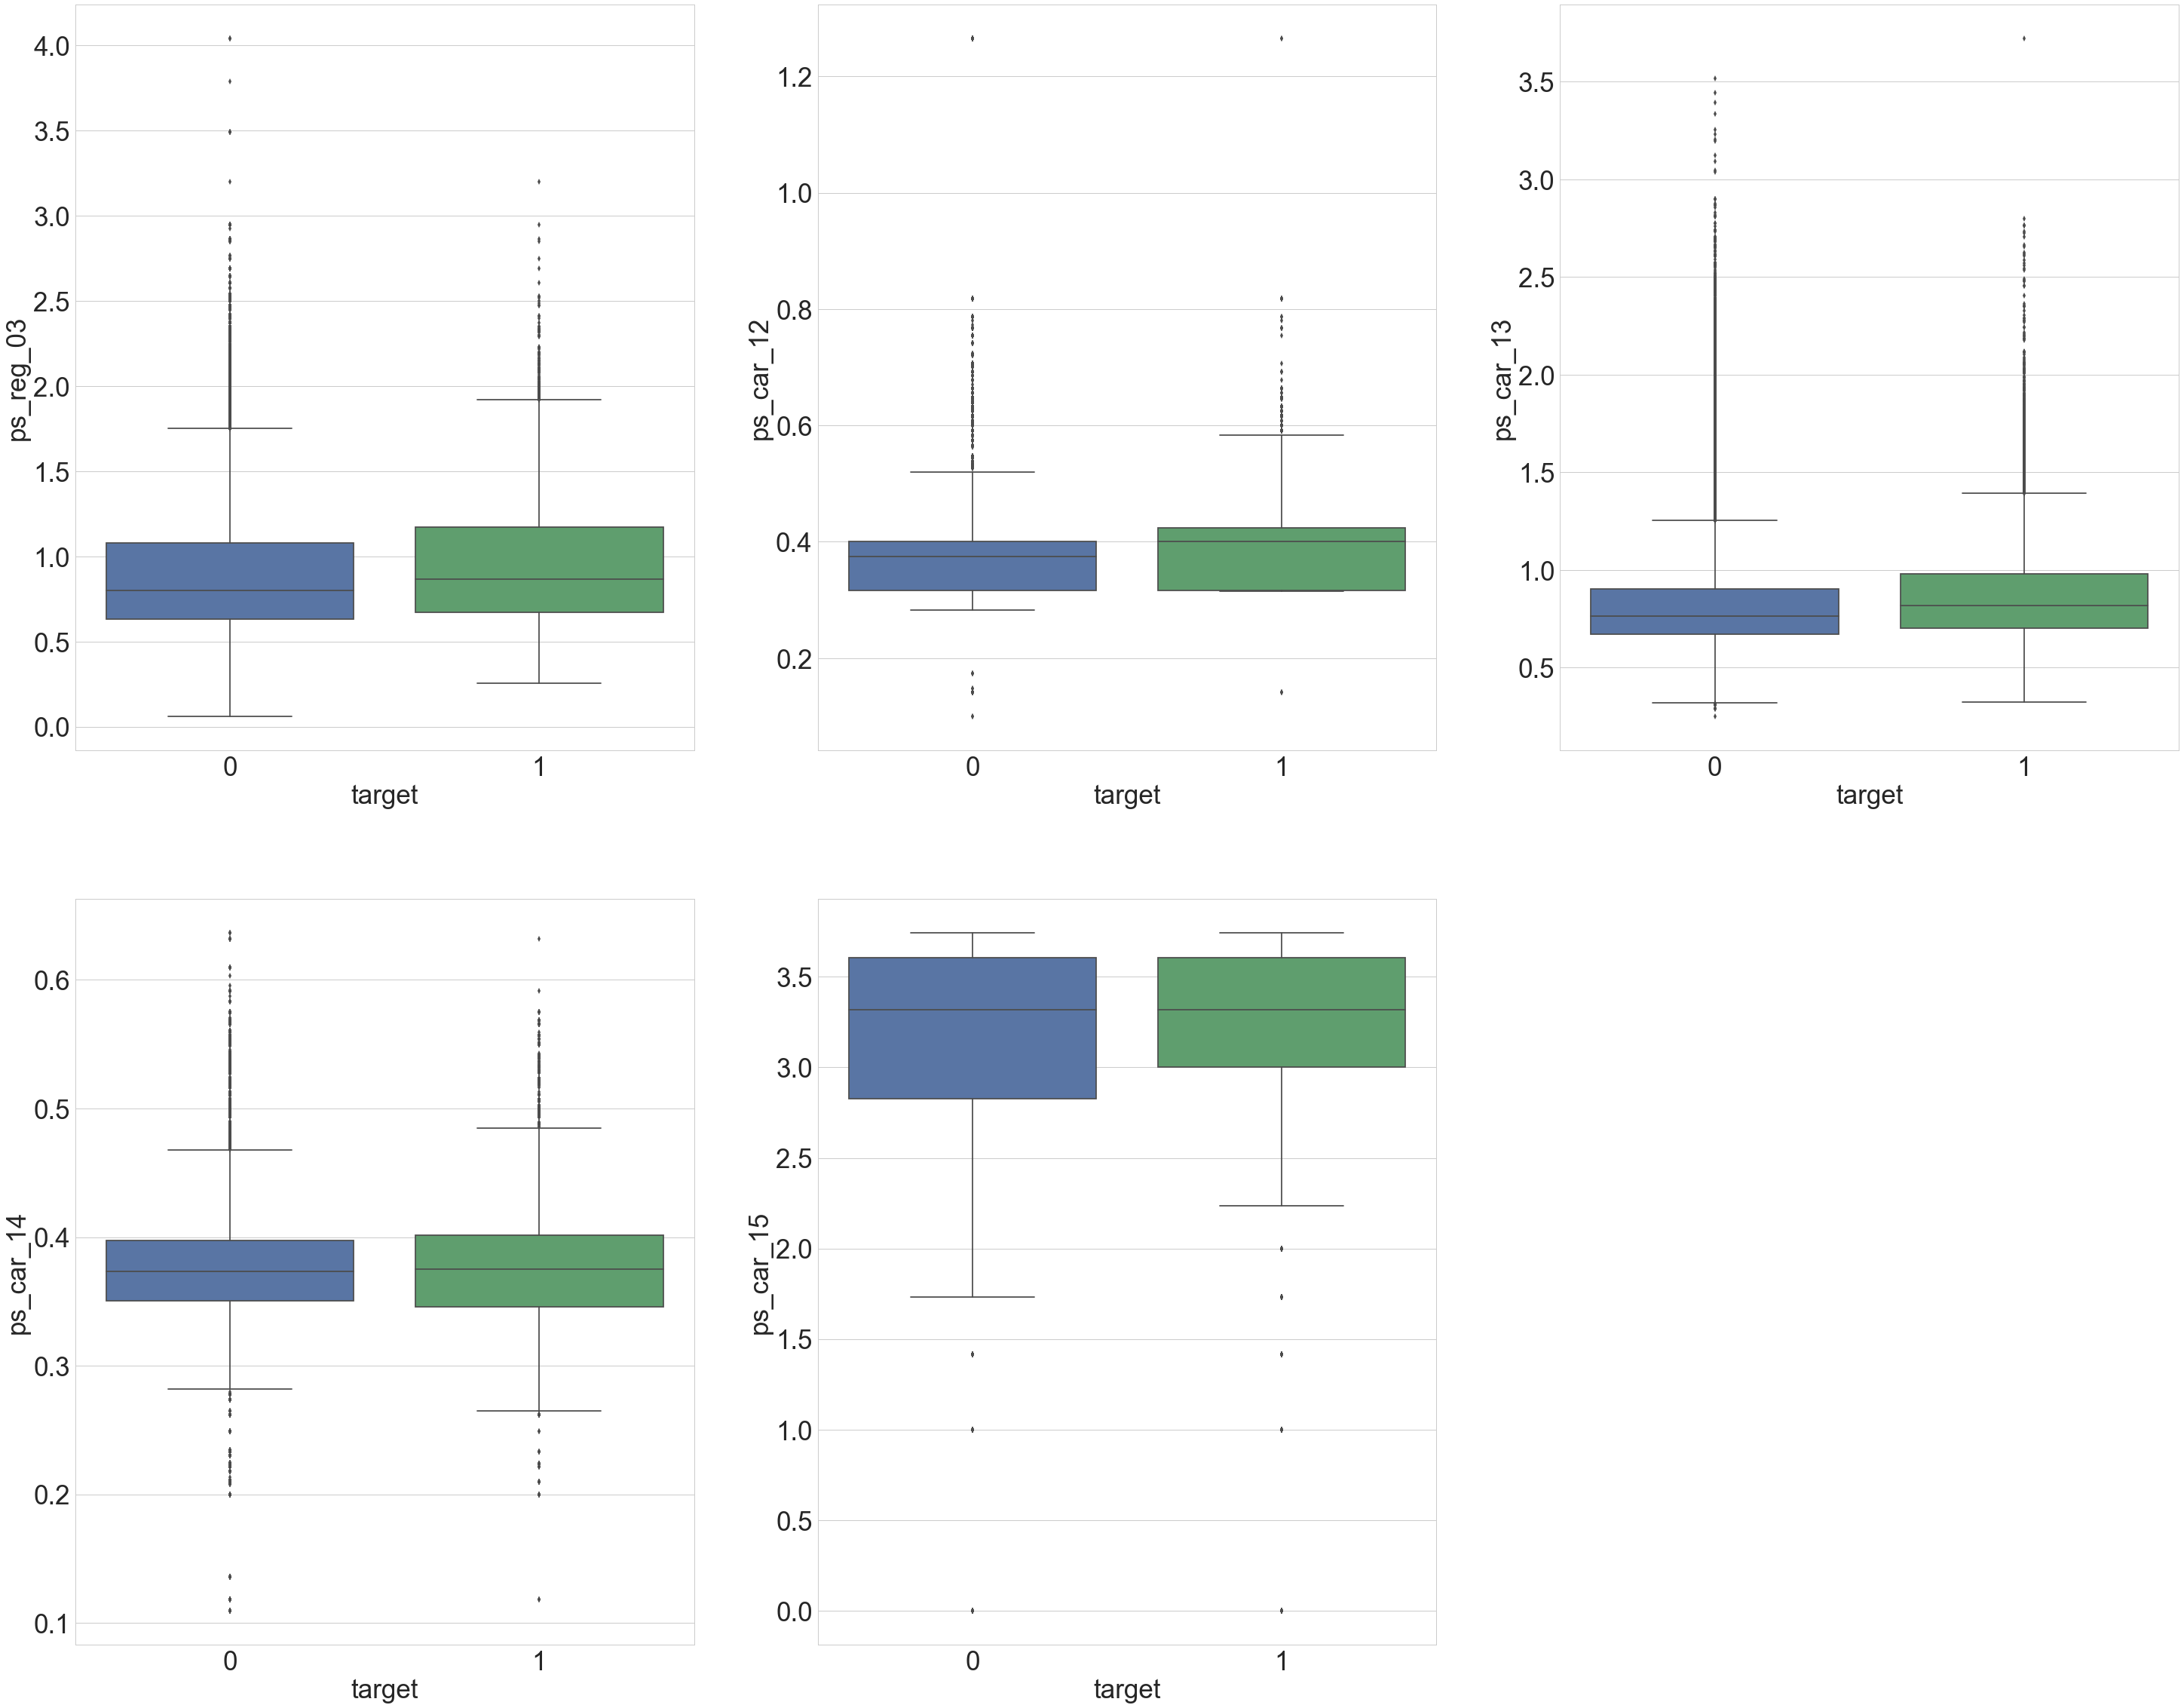

In [72]:
fig=plt.figure(figsize=(50,40))
for i, plot_vars in enumerate(contin):
    ax=fig.add_subplot(2,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.ylabel('ylabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    sns.boxplot(x="target", y=plot_vars, data=drivers)
plt.show()

We can see that distribution of this variables are highly skewed. That's why we have so many outliers. We'll need to normolize and scale them. But before this we need to impute missing values with the median value because median is better measure for skewed distribution than mean.

In [74]:
imp=Imputer(missing_values="NaN", strategy="median")
imp.fit(drivers[["ps_car_12"]])
drivers["ps_car_12"]=imp.transform(drivers[["ps_car_12"]]).ravel()
imp.fit(drivers[["ps_car_14"]])
drivers["ps_car_14"]=imp.transform(drivers[["ps_car_14"]]).ravel()

Variable ps_reg_03 contains about 18% of missing values. For this reason let's have a look if it is the target variable has variation across it.

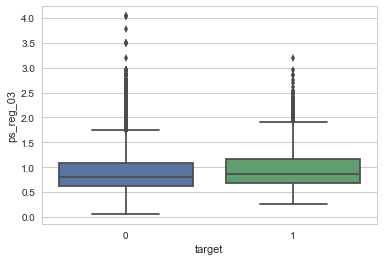

In [75]:
sns.boxplot(x="target", y="ps_reg_03", data=drivers)

We can see that at level 0 of target variable this variable has more variation and outliers. Also, the median of this variable for target level 1 is slightly higher than for value 0. We'll build regression models to impute this variable.

In [76]:
pd.options.mode.chained_assignment = None
#we will make logaritmic trancformation on this variables. They are right skewed and this transformation will help them.
new_con=['ps_car_12', 'ps_car_13', 'ps_car_14','ps_car_15']
drivers['ps_car_12'][drivers['ps_car_12']==0]=0.000001
drivers['ps_car_12']=np.log(drivers['ps_car_12'])
drivers['ps_car_13'][drivers['ps_car_13']==0]=0.000001
drivers['ps_car_13']=np.log(drivers['ps_car_13'])
drivers['ps_car_14'][drivers['ps_car_14']==0]=0.000001
drivers['ps_car_14']=np.log(drivers['ps_car_14'])
#for variable "ps_car_15' we will use box-cox to find appropriate transformation.
drivers['ps_car_15'][drivers['ps_car_15']==0]=0.000001
drivers["ps_car_15"],_=boxcox(drivers["ps_car_15"])


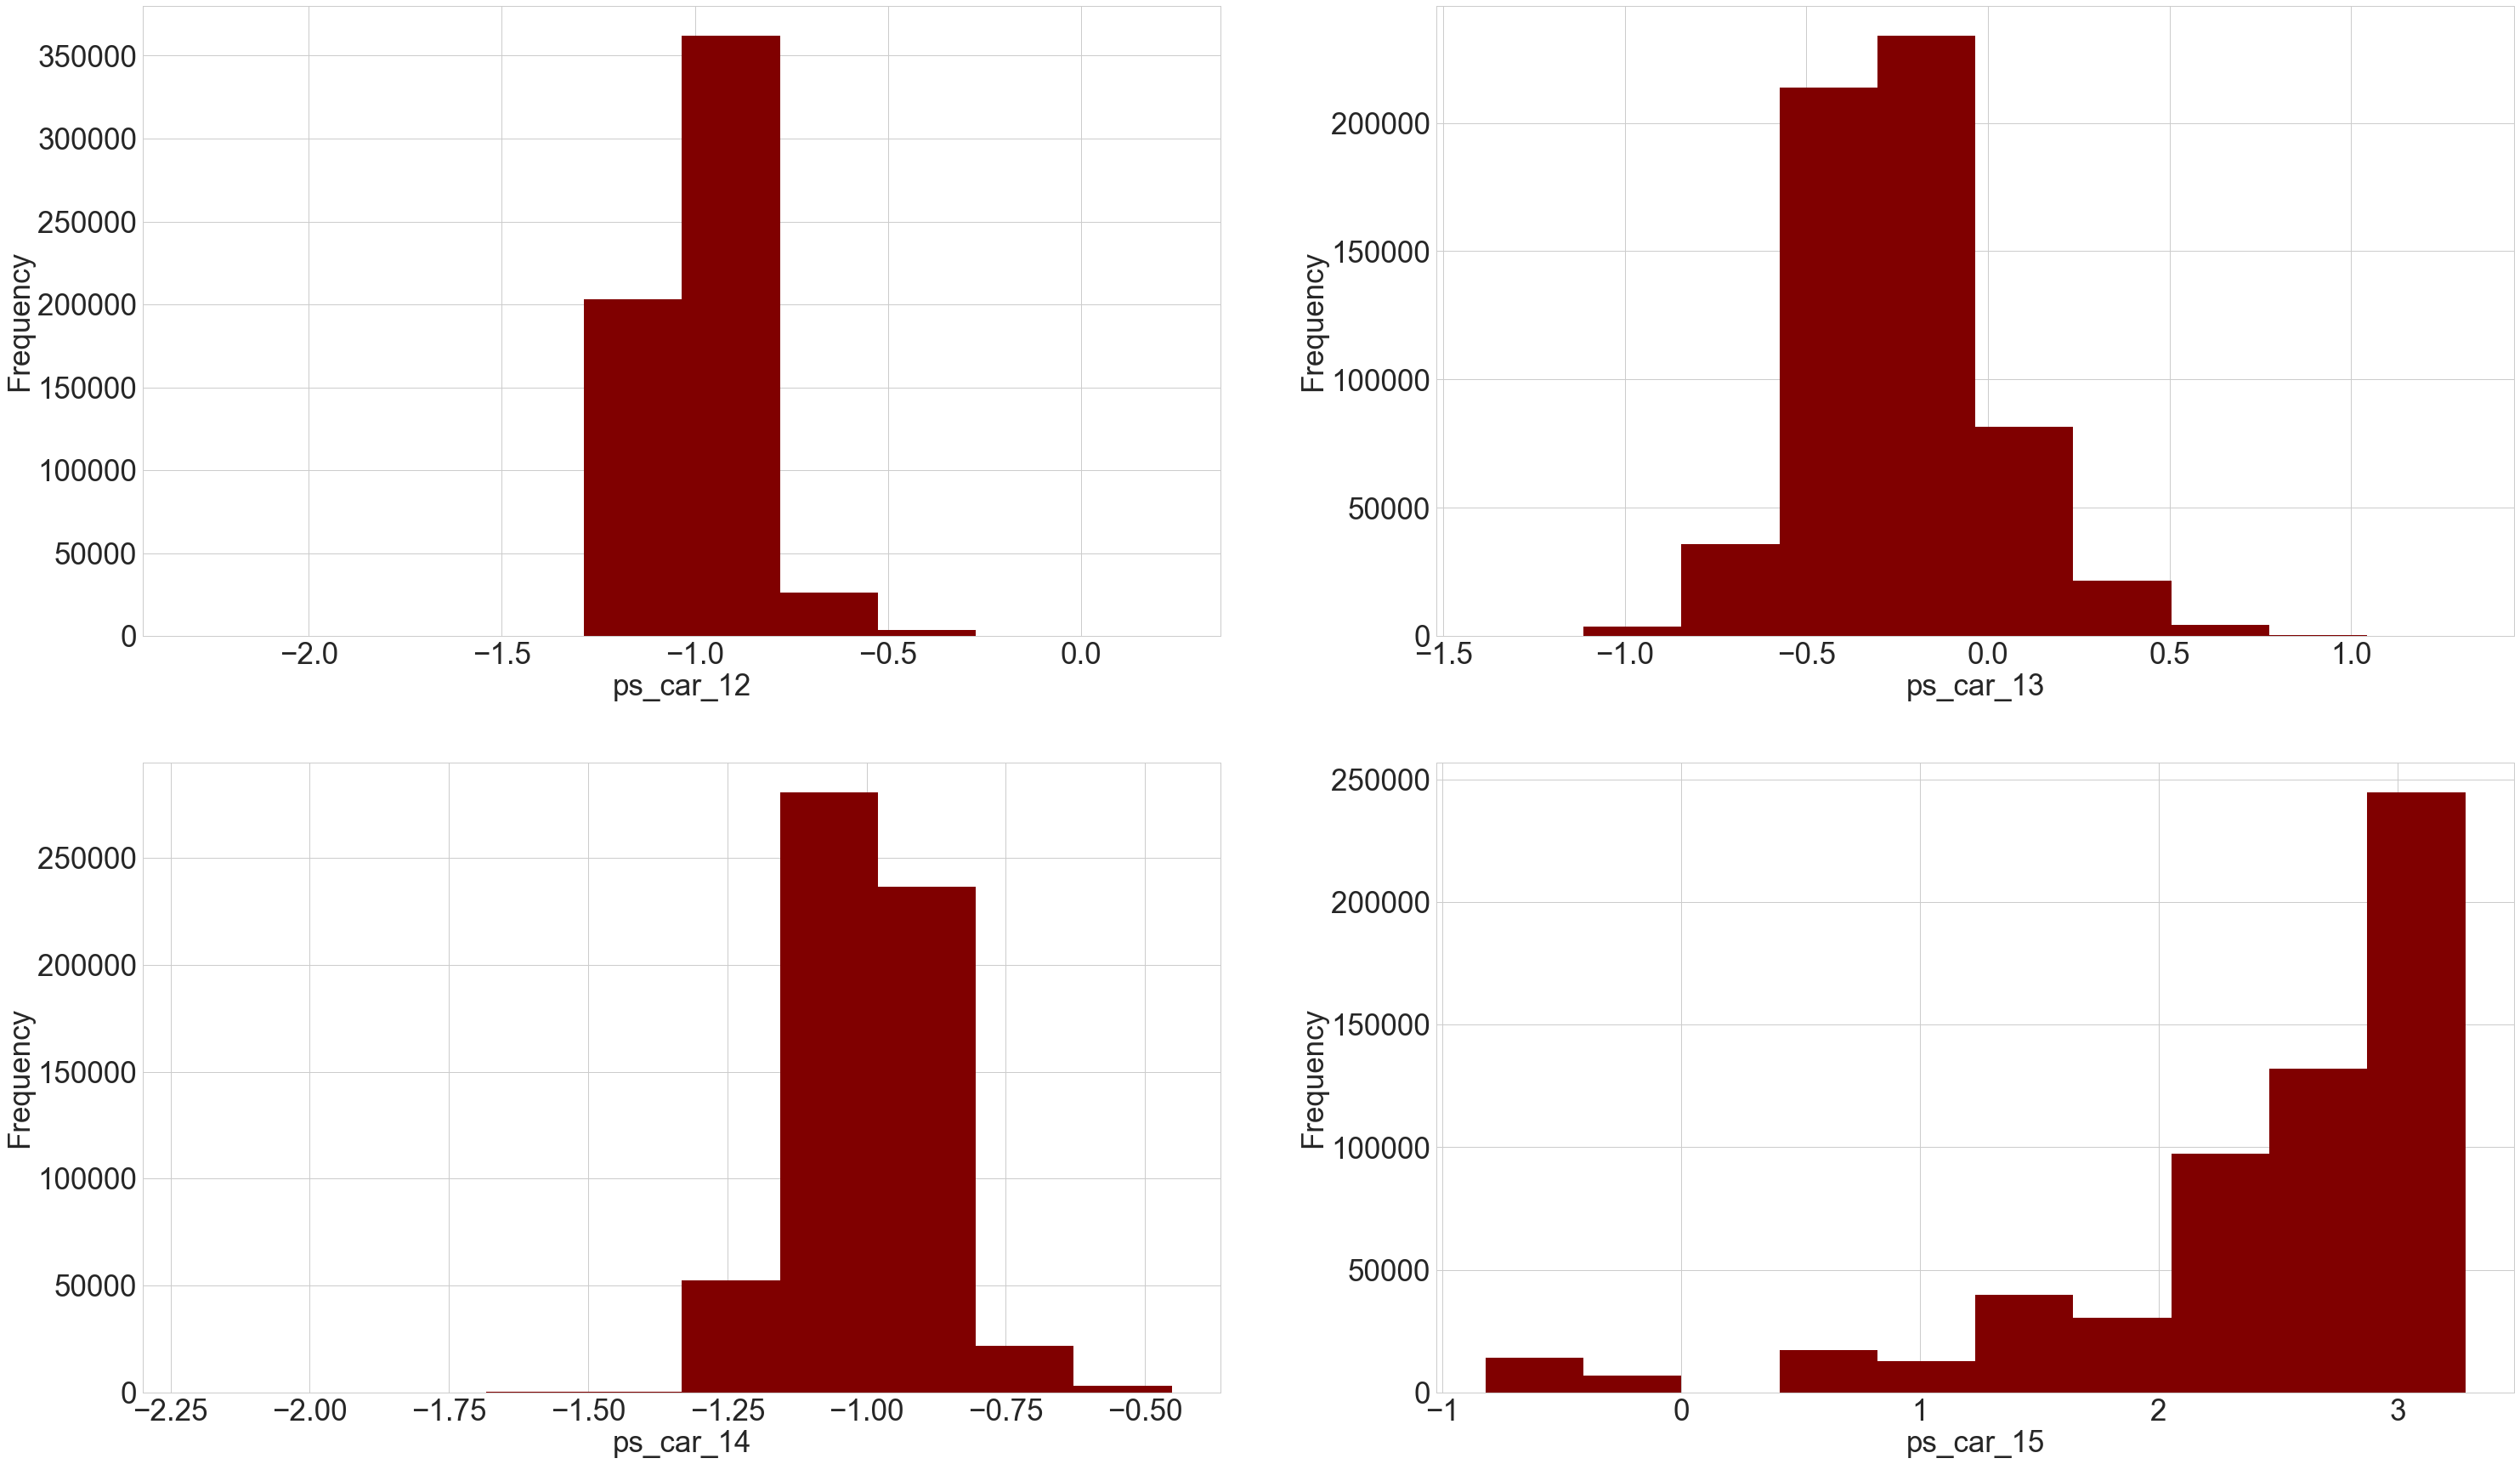

In [77]:
fig=plt.figure(figsize=(50,30))
for i, plot_vars in enumerate(new_con):
    ax=fig.add_subplot(2,2,i+1)
    plt.xlabel(plot_vars, fontsize=35)
    plt.ylabel('ylabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    
    drivers[plot_vars].plot.hist(color="maroon",ax=ax)
    #print(counts)
plt.show()

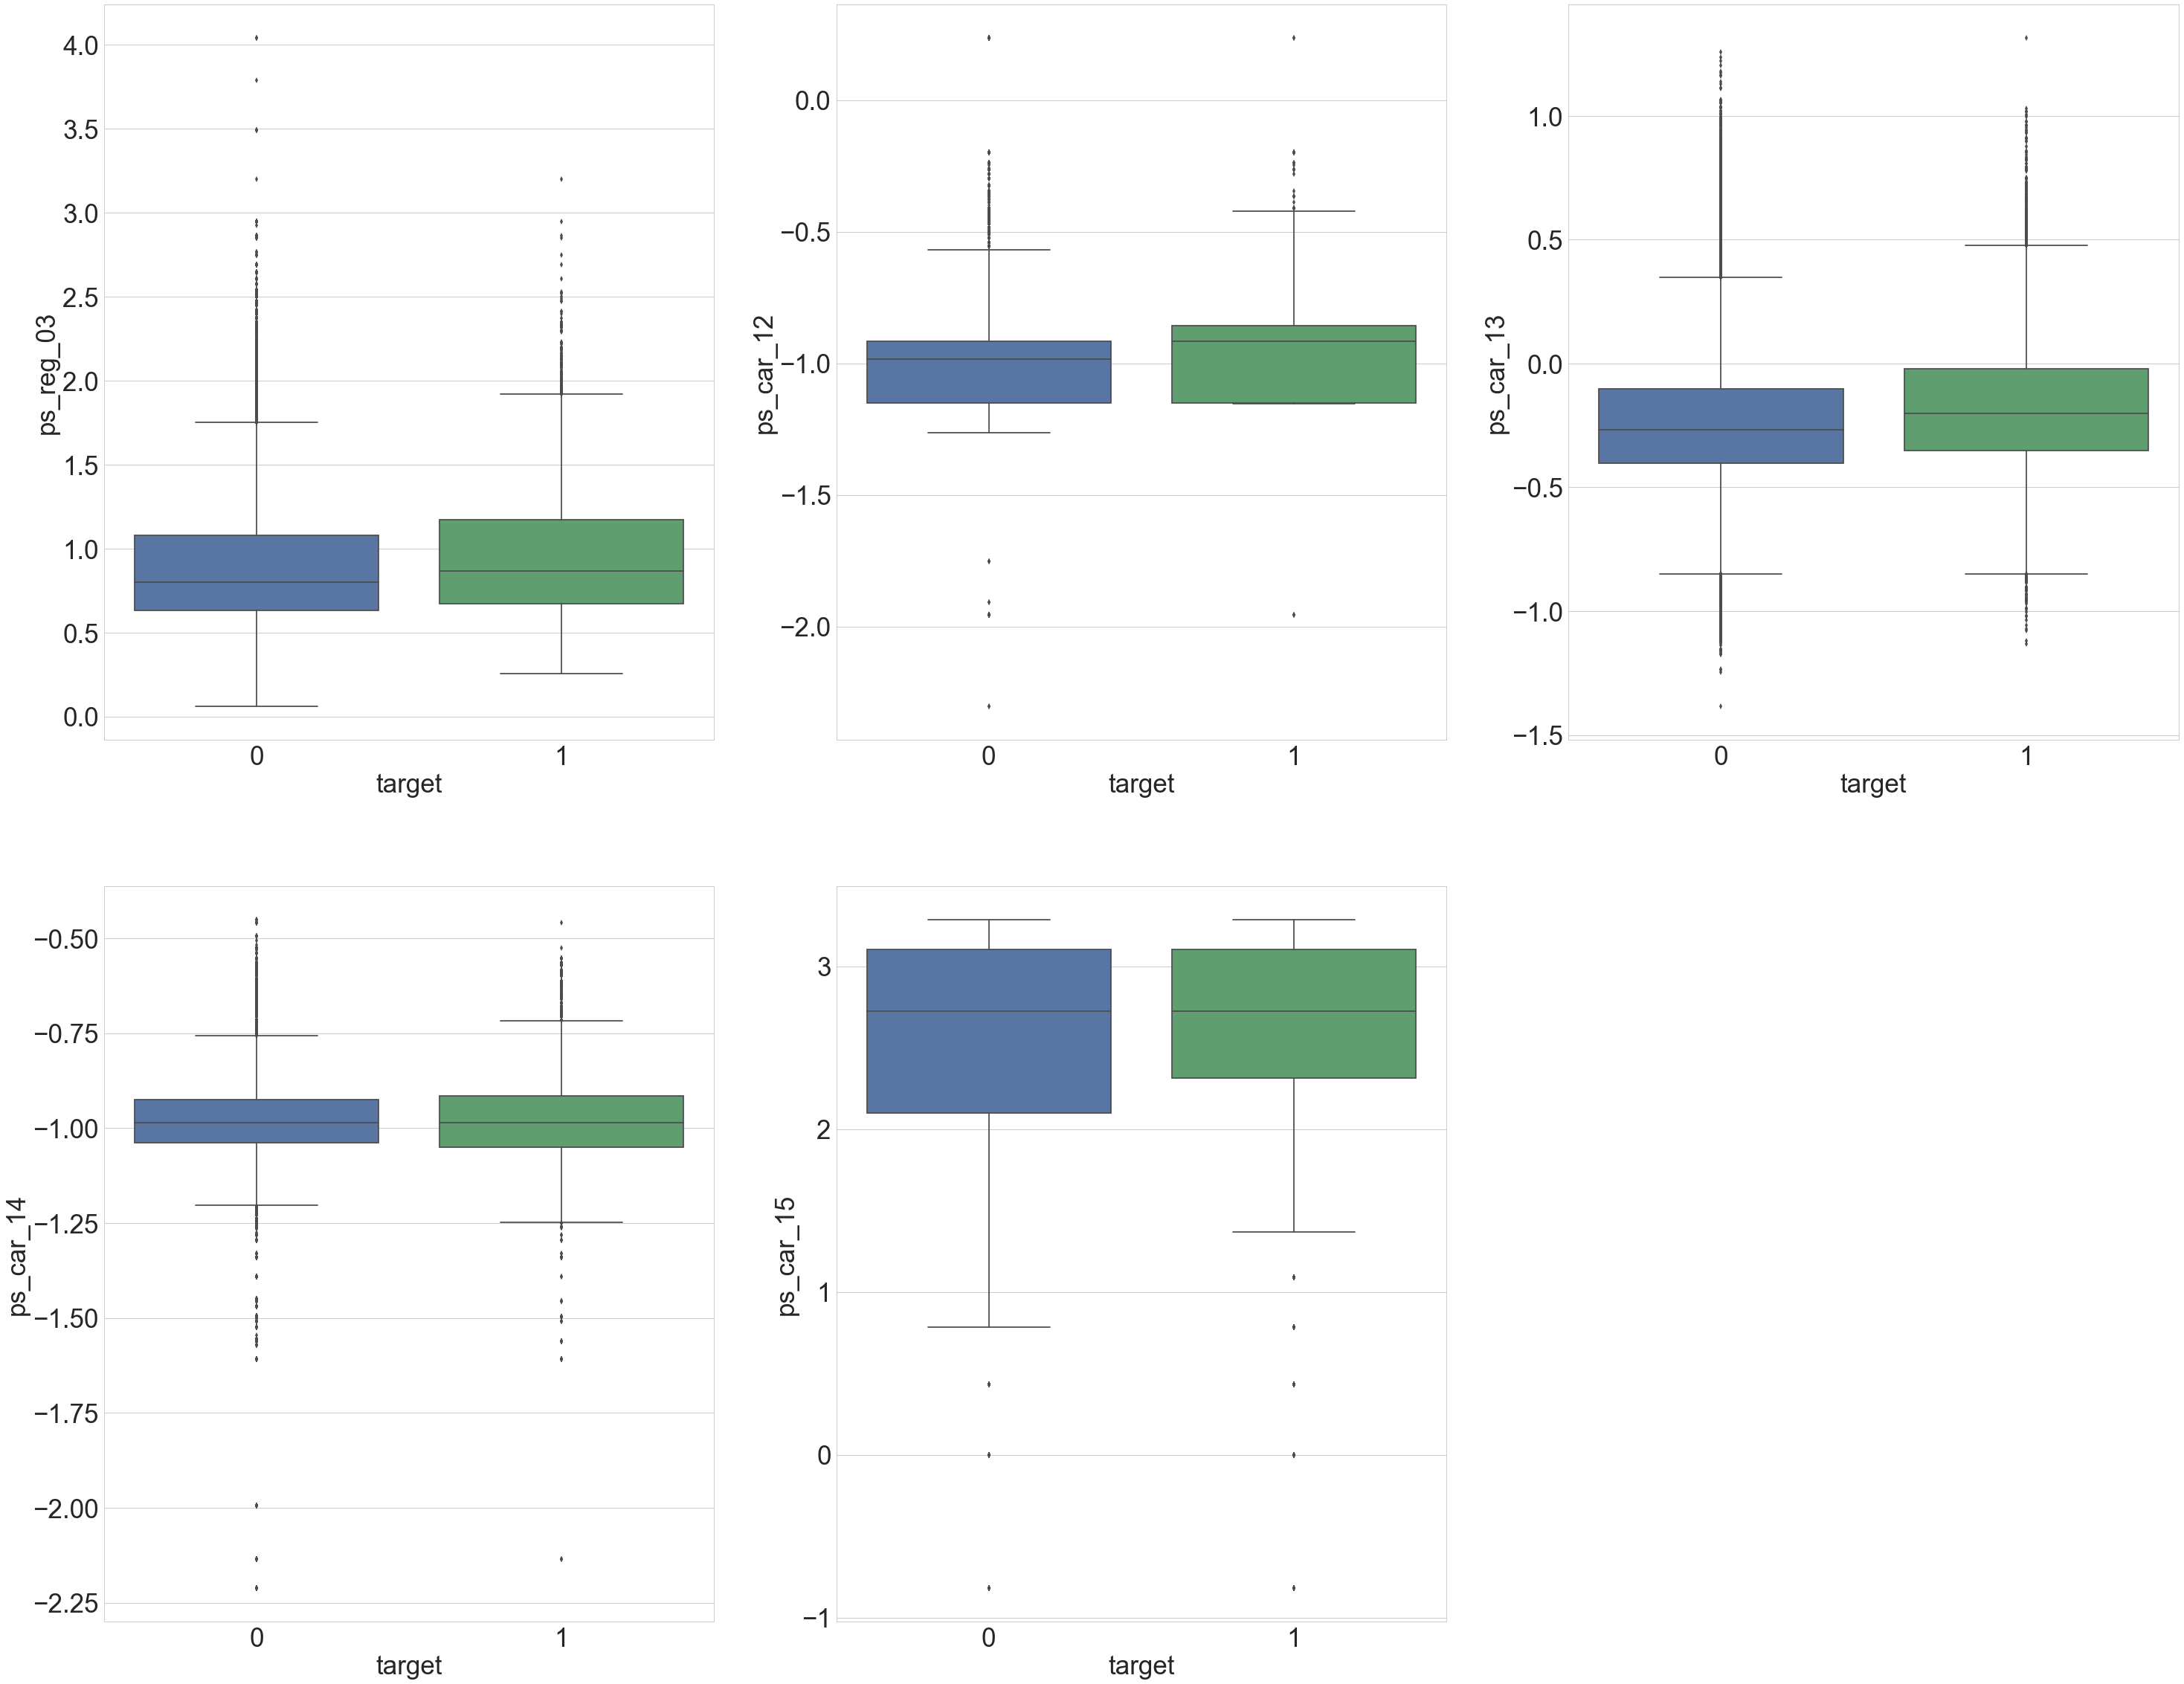

In [78]:
fig=plt.figure(figsize=(50,40))
for i, plot_vars in enumerate(contin):
    ax=fig.add_subplot(2,3,i+1)
    plt.xlabel('xlabel', fontsize=35)
    plt.ylabel('ylabel', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    sns.boxplot(x="target", y=plot_vars, data=drivers)
plt.show()

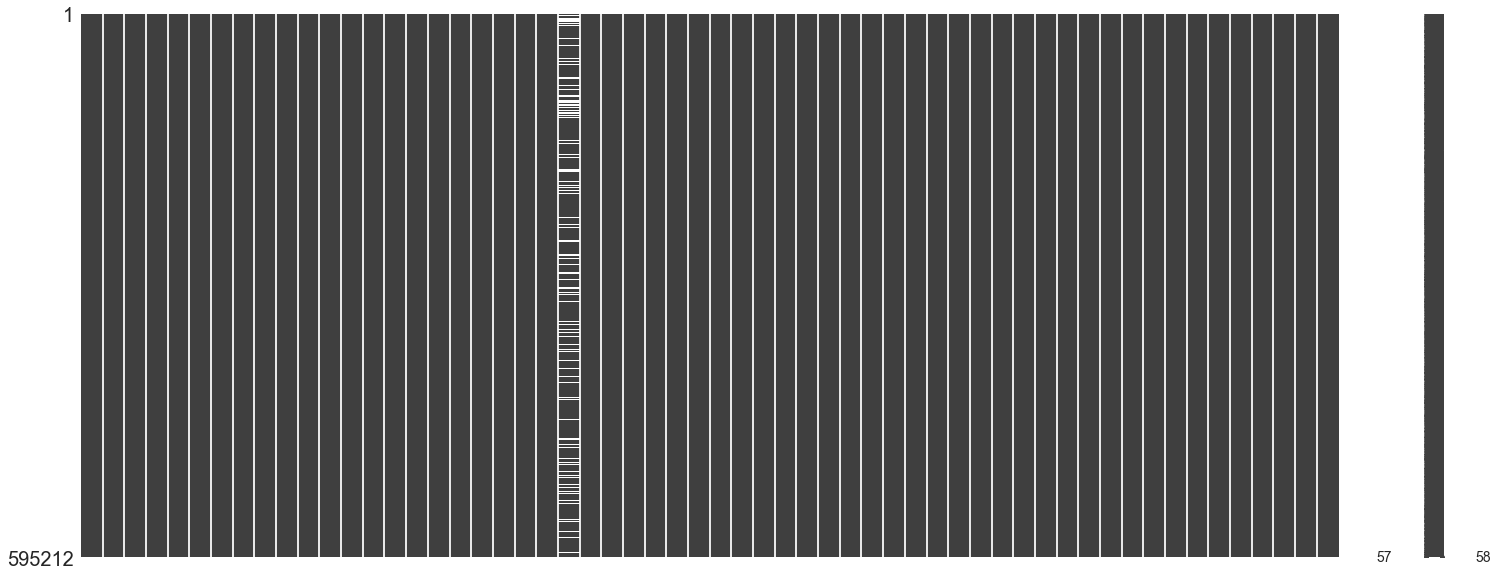

In [94]:
#lets Visualize the data one more time. Now we see that everything has been 
#imputed except ps_reg_03
msno.matrix(drivers)


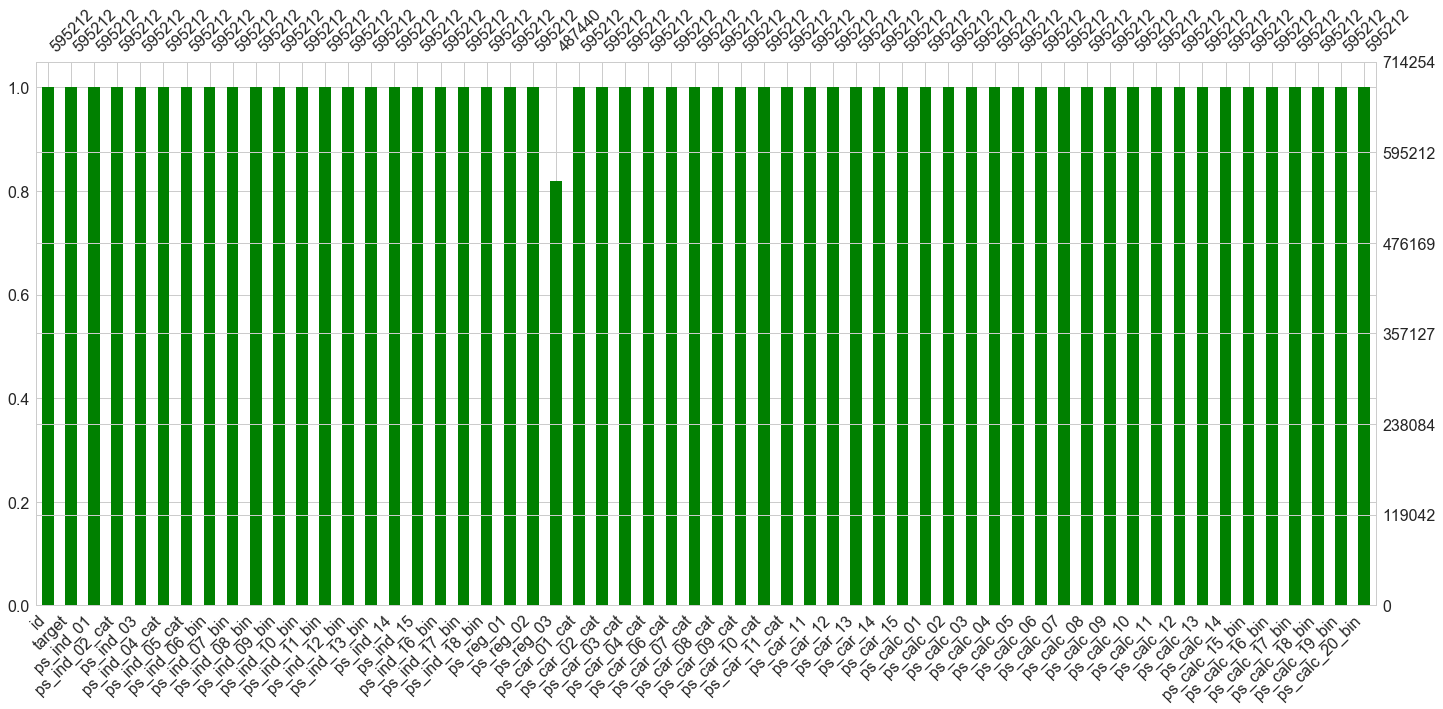

In [93]:
msno.bar(drivers,color='green',labels="Missing values Check")

## Regression to find the best imputation for variable ps_reg_03

At first we will break data on two data sets with missing values for variable and without

In [95]:
#let's break data set to where we have values for variable ps_reg_03 and where we don't have this values
change_type=['ps_ind_04_cat','ps_car_03_cat','ps_car_07_cat']
drivers[change_type]=drivers[change_type].convert_objects(convert_numeric=True)
driversLRG_missing=drivers.copy()
#data set to impute values
driversLRG_missing=driversLRG_missing[driversLRG_missing['ps_reg_03'].isnull()]
#test and train data set
driversLRG=drivers.copy()
driversLRG=driversLRG[driversLRG['ps_reg_03'].notnull()]

/Users/johnsonekedum/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


We will treat ordinal variabels as categorical type for this task. Also, we will not use 'target' variable for prediction of 'ps_reg_03' variable.

#### Let's make variables an appropriate type

In [43]:
#make the variables an apropriate type
new_binary=['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
         'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
         'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'ps_ind_04_cat', 'ps_car_02_cat',
         'ps_car_07_cat', 'ps_car_08_cat']
for col in new_binary:
    drivers[col]=drivers[col].astype("category")
for col in cat:
    drivers[col]=drivers[col].astype("category")

In [97]:
toDummies=['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
         'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
         'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'ps_ind_04_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
         'ps_car_07_cat', 'ps_car_08_cat',"ps_ind_02_cat", "ps_ind_05_cat", "ps_car_01_cat", "ps_car_04_cat", "ps_car_06_cat",
           "ps_car_09_cat",  "ps_car_10_cat","ps_car_11_cat",'ps_reg_01', 'ps_reg_02', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_calc_01', 'ps_calc_02',
         'ps_calc_03', 'ps_calc_04','ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 
         'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
listToCopy=["ps_reg_03", "ps_car_12", "ps_car_13", "ps_car_14", "ps_car_15"]
driversLRG_wDummies=pd.concat([pd.get_dummies(driversLRG[col],prefix=col) for col in toDummies], axis=1)
driversLRG_wDummies = pd.concat((driversLRG_wDummies, driversLRG[listToCopy]), axis=1)
driversLRG_missing_wDummies=pd.concat([pd.get_dummies(driversLRG_missing[col],prefix=col) for col in toDummies], axis=1)
driversLRG_missing_wDummies = pd.concat((driversLRG_missing_wDummies, driversLRG_missing[listToCopy]), axis=1)

In [98]:
driversLRG_wDummies['ps_reg_03'][driversLRG_wDummies['ps_reg_03']==0]=0.000001
driversLRG_wDummies['ps_reg_03']=np.log(driversLRG_wDummies['ps_reg_03'])

In [99]:
if 'ps_reg_03' in driversLRG_wDummies:
    y = driversLRG_wDummies['ps_reg_03'].values 
    del driversLRG_wDummies['ps_reg_03'] #delete variable
    X = driversLRG_wDummies.values #values of all other variables

Because we have around 500k records we will split our data on 3 data sets - train, validation, test in proportion. Reservin for test 20% of data and for the training with cross-validation the rest 80% of data.

In [100]:
x_cv, x_reserved, y_cv, y_reserved = train_test_split(X,y,test_size=0.2,train_size=0.8)

### Partial least squares regression

Let's see how principle components explain variation in a data set.

In [101]:
#we'll choose 150 principal components.
from sklearn.cross_decomposition import PLSRegression
from sklearn import cross_validation
pls=PLSRegression(n_components=150, scale=False)
pls.fit(x_cv,y_cv)
scores = cross_validation.cross_val_score(pls, x_cv,y_cv, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
print("RMSE Mean:", rmse_scores.mean())
print("RMSE Standard deviation:", rmse_scores.std())

/Users/johnsonekedum/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


('RMSE Mean:', 0.22432217887400735)
('RMSE Standard deviation:', 0.001349085844121343)


We will use method with the lowest RMSE to predict and impute the missing values for variable ps_reg_03.
The best method turned out to be PLS regression with 150 principle components. The RMSE from this method is 0.206

In [102]:
from math import sqrt
y_hat=pls.predict(x_reserved)
mean_sqrt=mean_squared_error(y_reserved, y_hat)
rms = sqrt(mean_sqrt)
print ("Mean squared error",mean_sqrt)
print ("RMSE",rms)

('Mean squared error', 0.050091631778662181)
('RMSE', 0.223811598847473)


Let's fit the whole data set without missing values for ps_reg_03 to predict and impute missing values.

But at first let's compare if both data sets have the same number of columns.

In [103]:
driversLRG_missing=drivers.copy()
#data set to impute values
driversLRG_missing=driversLRG_missing[driversLRG_missing['ps_reg_03'].isnull()]
#test and train data set
driversLRG=drivers.copy()
driversLRG=driversLRG[driversLRG['ps_reg_03'].notnull()]
toDummies=['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
         'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
         'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'ps_ind_04_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
         'ps_car_07_cat', 'ps_car_08_cat',"ps_ind_02_cat", "ps_ind_05_cat", "ps_car_01_cat", "ps_car_04_cat", "ps_car_06_cat",
           "ps_car_09_cat",  "ps_car_10_cat","ps_car_11_cat",'ps_reg_01', 'ps_reg_02', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_calc_01', 'ps_calc_02',
         'ps_calc_03', 'ps_calc_04','ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 
         'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
listToCopy=["ps_reg_03", "ps_car_12", "ps_car_13", "ps_car_14", "ps_car_15"]
driversLRG_wDummies=pd.concat([pd.get_dummies(driversLRG[col],prefix=col) for col in toDummies], axis=1)
driversLRG_wDummies = pd.concat((driversLRG_wDummies, driversLRG[listToCopy]), axis=1)
driversLRG_missing_wDummies=pd.concat([pd.get_dummies(driversLRG_missing[col],prefix=col) for col in toDummies], axis=1)
driversLRG_missing_wDummies = pd.concat((driversLRG_missing_wDummies, driversLRG_missing[listToCopy]), axis=1)

In [109]:
namesLRG=driversLRG_wDummies.columns.values
namesMiss=driversLRG_missing_wDummies.columns.values

In [110]:
#missing columns in driversLRG_wDummies
miss_col1=list(set(namesLRG) - set(namesMiss))
print(miss_col1)

['ps_calc_10_25', 'ps_calc_06_1', 'ps_calc_06_0', 'ps_calc_12_10', 'ps_calc_14_23', 'ps_calc_13_13', 'ps_calc_14_22', 'ps_calc_12_9', 'ps_calc_11_18']


In [111]:
#missing columns in driversLRG_missing_wDummies
miss_col2=list(set(namesMiss) - set(namesLRG))
print(miss_col2)

['ps_calc_10_24', 'ps_calc_11_19']


As we can see the number of columns doesn't match between two data sets. We'll delete unmatching columns from the data sets.

In [112]:
driversLRG_wDummies2=driversLRG_wDummies.copy()
driversLRG_wDummies2.drop(miss_col1,inplace=True, axis=1)

In [113]:
driversLRG_missing_wDummies2=driversLRG_missing_wDummies.copy()
driversLRG_missing_wDummies2.drop(miss_col2,inplace=True, axis=1)

In [114]:
if 'ps_reg_03' in driversLRG_wDummies2:
    y_2 = driversLRG_wDummies2['ps_reg_03'].values 
    del driversLRG_wDummies2['ps_reg_03'] 
    X_2 = driversLRG_wDummies2.values 
if 'ps_reg_03' in driversLRG_missing_wDummies2:
    y_miss = driversLRG_missing_wDummies2['ps_reg_03'].values 
    del driversLRG_missing_wDummies2['ps_reg_03'] 
    X_miss = driversLRG_missing_wDummies2.values 

In [115]:
plse_full=pls.fit(X_2,y_2)
y_hat=pls.predict(X_miss)

Let's impute the ps_reg_03 with predicted values.

In [116]:
y_frame=pd.DataFrame(data=y_hat,columns=["ps_reg_03"])

In [117]:
#contacenate this variable to the driversLRG_missing
driversLRG_missing.drop('ps_reg_03',inplace=True,axis=1)
driversLRG_missing=pd.concat((driversLRG_missing,y_frame),axis=1,join="inner")

In [118]:
#create final data frame with target variable
drivers2=pd.concat((driversLRG,driversLRG_missing))
drivers2.drop('id',axis=1,inplace=True)

In [119]:
to_cat=['ps_car_03_cat','ps_car_11_cat']
for cat in to_cat:
    drivers2[cat].astype("category")

In [120]:
missVal=drivers2.isnull().sum()*100/len(drivers2)
missVal.iloc[missVal.nonzero()]

Series([], dtype: float64)

## Feature selection for classification

Let's choose features which have statistically significant variation across categories of target variable.

In [121]:
from sklearn.feature_selection import chi2, VarianceThreshold
list_to_check=['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12',
       'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin',
       'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat',
       'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11', 'ps_car_11_cat','ps_ind_01',
       'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat',
       'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',
       'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin',
       'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin',
       'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02']
matrix_to_check=drivers2[list_to_check].values
y=drivers2['target'].values
selection=chi2(X=matrix_to_check,y=y)
p_value=selection[1]
for value, feature in zip(p_value, list_to_check):
    print(feature,"p-value: ",value)


('ps_calc_01', 'p-value: ', 0.51502473695925077)
('ps_calc_02', 'p-value: ', 0.96796062409147599)
('ps_calc_03', 'p-value: ', 0.5030858009470397)
('ps_calc_04', 'p-value: ', 0.74646469508112867)
('ps_calc_05', 'p-value: ', 0.68566803091202044)
('ps_calc_06', 'p-value: ', 0.88614431170843799)
('ps_calc_07', 'p-value: ', 0.70816888989886262)
('ps_calc_08', 'p-value: ', 0.8615648465457505)
('ps_calc_09', 'p-value: ', 0.95228788407450027)
('ps_calc_10', 'p-value: ', 0.67786822052769902)
('ps_calc_11', 'p-value: ', 0.89196460714850878)
('ps_calc_12', 'p-value: ', 0.27758248596126334)
('ps_calc_13', 'p-value: ', 0.77366516588581224)
('ps_calc_14', 'p-value: ', 0.078304763027652047)
('ps_calc_15_bin', 'p-value: ', 0.52850607988777232)
('ps_calc_16_bin', 'p-value: ', 0.66711098552761794)
('ps_calc_17_bin', 'p-value: ', 0.92020500142873995)
('ps_calc_18_bin', 'p-value: ', 0.9433815624837143)
('ps_calc_19_bin', 'p-value: ', 0.40567515874372628)
('ps_calc_20_bin', 'p-value: ', 0.36068610325829864

In [148]:
#let's choose only statistically significant features
feature_list=[]
for value, feature in zip(p_value, list_to_check):
    if value<0.05:
        feature_list.append(feature)
print ("Selected features:")
print(feature_list)
print ("Number original features: ",len(list_to_check))
print("Number selected features: ",len(feature_list))

Selected features:
['ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_12_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_reg_01', 'ps_reg_02']
('Number original features: ', 51)
('Number selected features: ', 24)


In [190]:
X=drivers2.values


507063

# Classification

Because we have about 600k observations, we'll reserve 20% of data for testing and 80% data for model building with cross validation.

In [187]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,train_size=0.8)

### Feature selection Random Forest

We'll do feature selection using random forest. For this reason we will not create dummies at this point.

### Let's try to reduce dimensionality of data by clustering some features

The values wth the same prefix come from the same group. This way we have following groups:<br>
Group 1: 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04','ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',    'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin',    'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'<br>

Group 2: 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat','ps_car_08_cat',  'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11', 'ps_car_11_cat', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15'

<br>Group 3: 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin'<br>

Group 4: 'ps_reg_01', 'ps_reg_02', 'ps_reg_03'

#### Let's try K-means cluster

Let's try to create clusters for the first set of features

In [191]:
names = drivers2.columns.values
df_rf_train = pd.DataFrame(data=x_train,   columns =names)
df_rf_test = pd.DataFrame(data=x_test,   columns = names )

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

# Create a list of feature names
feat_labels = drivers2.columns.values

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid={'max_depth':[3,5,8,10,14]}

In [193]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(class_weight="balanced",n_jobs=-1)
grid={'solver':['lbfgs','liblinear'],  'C' : [0.0001,0.1,1,10,100]}
gs = GridSearchCV( clf,  grid,  scoring='f1',  cv=2)


GridSearchCV(cv=2, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [195]:
gs.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

As we can see, the F1 - score didn't improved. Now, let's try to create 4 clusters and find optimum amount of clusters. And see if it improves F1 - score.

## Look for the best number of clusters

### Iteration 1

In [200]:
%%time
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn.cluster import MiniBatchKMeans
X1_train = df_rf_train[['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04','ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
               'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
               'ps_calc_16_bin','ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']]
X2_train=df_rf_train[['ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
             'ps_car_08_cat',  'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11', 'ps_car_11_cat']]
X3_train=df_rf_train[['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
             'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 
             'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']]
X4_train=df_rf_train[['ps_reg_01', 'ps_reg_02']].values
contin=["ps_reg_03", "ps_car_12", "ps_car_13", "ps_car_14", "ps_car_15"]
X1_test = df_rf_test[['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04','ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
               'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
               'ps_calc_16_bin','ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']]
X2_test=df_rf_test[['ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
             'ps_car_08_cat',  'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11', 'ps_car_11_cat']]
X3_test=df_rf_test[['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
             'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 
             'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']]
X4_test=df_rf_test[['ps_reg_01', 'ps_reg_02']]


                

CPU times: user 132 ms, sys: 193 ms, total: 325 ms
Wall time: 374 ms


In [199]:
f1_list=[]
num_clusters_all=[]
clusters=[10,20,30,40]
#clusters=[2,3]
clust4=[10,20]
for num_clusters1 in clusters:
    for num_clusters2 in clusters:
        for num_clusters3 in clusters:
            for num_clusters4 in clust4:
                num_clusters=[]
                #first clustering
                cls = MiniBatchKMeans(n_clusters=num_clusters1, init='k-means++',random_state=1)
                cls.fit(X1_train)
                newfeature1 = cls.labels_ 
                num_clusters.append(num_clusters1)
                #second clustering
                cls = MiniBatchKMeans(n_clusters=num_clusters2, init='k-means++',random_state=1)
                cls.fit(X2_train)
                newfeature2 = cls.labels_ 
                num_clusters.append(num_clusters2)
                #third clustering
                cls = MiniBatchKMeans(n_clusters=num_clusters3, init='k-means++',random_state=1)
                cls.fit(X3_train)
                newfeature3 = cls.labels_ 
                num_clusters.append(num_clusters3)
                #forth clustering
                cls = MiniBatchKMeans(n_clusters=num_clusters4, init='k-means++',random_state=1)
                cls.fit(X4_train)
                newfeature4 = cls.labels_ 
                num_clusters.append(num_clusters4)
                num_clusters_all.append(num_clusters)
                #get one data set
                X = np.column_stack((pd.get_dummies(newfeature1),pd.get_dummies(newfeature2),pd.get_dummies(newfeature3),
                                    pd.get_dummies(newfeature4),df_rf_train[contin]))
                gs = GridSearchCV(clf, grid, scoring='f1', cv=2)
                fitted=gs.fit(X, y_train)
                f1=gs.best_score_
                f1_list.append(f1)




Process PoolWorker-5019:
Process PoolWorker-5020:
Process PoolWorker-5023:
Process PoolWorker-5024:
Process PoolWorker-5021:
Process PoolWorker-5018:
Process PoolWorker-5022:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/johnsonekedum/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/Users/johnsonekedum/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/Users/johnsonekedum/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/Users/johnsonekedum/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/Users/johnsonekedum/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/Users/johnsonekedum/anaconda2/lib/python2

KeyboardInterrupt: 

In [198]:
max_f1=max(f1_list)
max_index = f1_list.index(max_f1)
print(max_index)
print("Number of clusters chosen for Group 1: ", num_clusters_all[94][0])
print("Number of clusters chosen for Group 2: ", num_clusters_all[94][1])
print("Number of clusters chosen for Group 3: ", num_clusters_all[94][2])
print("Number of clusters chosen for Group 4: ", num_clusters_all[94][3])

0


IndexError: list index out of range

### Iteration 2

In [147]:
f1_list=[]
num_clusters_all=[]
clust1=[26,30,34]
clust2=[36,40,50]
clust3=[36,40,50]
#clusters=[2,3]
clust4=[6,14]
for num_clusters1 in clust1:
    for num_clusters2 in clust2:
        for num_clusters3 in clust3:
            for num_clusters4 in clust4:
                num_clusters=[]
                #first clustering
                cls = MiniBatchKMeans(n_clusters=num_clusters1, init='k-means++',random_state=1)
                cls.fit(X1_train)
                newfeature1 = cls.labels_ 
                num_clusters.append(num_clusters1)
                #second clustering
                cls = MiniBatchKMeans(n_clusters=num_clusters2, init='k-means++',random_state=1)
                cls.fit(X2_train)
                newfeature2 = cls.labels_ 
                num_clusters.append(num_clusters2)
                #third clustering
                cls = MiniBatchKMeans(n_clusters=num_clusters3, init='k-means++',random_state=1)
                cls.fit(X3_train)
                newfeature3 = cls.labels_ 
                num_clusters.append(num_clusters3)
                #forth clustering
                cls = MiniBatchKMeans(n_clusters=num_clusters4, init='k-means++',random_state=1)
                cls.fit(X4_train)
                newfeature4 = cls.labels_ 
                num_clusters.append(num_clusters4)
                num_clusters_all.append(num_clusters)
                #get one data set
                X = np.column_stack((pd.get_dummies(newfeature1),pd.get_dummies(newfeature2),pd.get_dummies(newfeature3),
                                    pd.get_dummies(newfeature4),df_rf_train[contin]))
                gs = GridSearchCV(clf, grid, scoring='f1', cv=2)
                fitted=gs.fit(X, y_train)
                f1=gs.best_score_
                f1_list.append(f1)

####  code for test set

In [ ]:
'''                #prepare test set
                cls = MiniBatchKMeans(n_clusters=num_clusters1, init='k-means++',random_state=1)
                cls.fit(X1_test)
                newfeature1_test = cls.labels_ 
                #second clustering
                cls = MiniBatchKMeans(n_clusters=num_clusters2, init='k-means++',random_state=1)
                cls.fit(X2_test)
                newfeature2_test = cls.labels_ 
                #third clustering
                cls = MiniBatchKMeans(n_clusters=num_clusters3, init='k-means++',random_state=1)
                cls.fit(X3_test)
                newfeature3_test = cls.labels_ 
                #forth clustering
                cls = MiniBatchKMeans(n_clusters=num_clusters4, init='k-means++',random_state=1)
                cls.fit(X4_test)
                newfeature4_test = cls.labels_ 
                #get one data set
                x_test = np.column_stack((pd.get_dummies(newfeature1_test),pd.get_dummies(newfeature2_test),
                                          pd.get_dummies(newfeature3_test),pd.get_dummies(newfeature4_test),df_rf_test[contin]))
                y_pred = fitted.best_estimator_.predict(x_test)'''

In [149]:
max_f1=max(f1_list)
max_index = f1_list.index(max_f1)
print('Max F1-score: ', max_f1)
print("Number of clusters chosen for Group 1: ", num_clusters_all[max_index][0])
print("Number of clusters chosen for Group 2: ", num_clusters_all[max_index][1])
print("Number of clusters chosen for Group 3: ", num_clusters_all[max_index][2])
print("Number of clusters chosen for Group 4: ", num_clusters_all[max_index][3])

Max F1-score:  0.0936119288789
Number of clusters chosen for Group 1:  34
Number of clusters chosen for Group 2:  40
Number of clusters chosen for Group 3:  40
Number of clusters chosen for Group 4:  6


### Iteration 3

In [150]:
f1_list=[]
num_clusters_all=[]
clust1=[33,34,35]
clust2=[38,40,42]
clust3=[38,40,42]
#clusters=[2,3]
clust4=[6,8,10]
for num_clusters1 in clust1:
    for num_clusters2 in clust2:
        for num_clusters3 in clust3:
            for num_clusters4 in clust4:
                num_clusters=[]
                #first clustering
                cls = MiniBatchKMeans(n_clusters=num_clusters1, init='k-means++',random_state=1)
                cls.fit(X1_train)
                newfeature1 = cls.labels_ 
                num_clusters.append(num_clusters1)
                #second clustering
                cls = MiniBatchKMeans(n_clusters=num_clusters2, init='k-means++',random_state=1)
                cls.fit(X2_train)
                newfeature2 = cls.labels_ 
                num_clusters.append(num_clusters2)
                #third clustering
                cls = MiniBatchKMeans(n_clusters=num_clusters3, init='k-means++',random_state=1)
                cls.fit(X3_train)
                newfeature3 = cls.labels_ 
                num_clusters.append(num_clusters3)
                #forth clustering
                cls = MiniBatchKMeans(n_clusters=num_clusters4, init='k-means++',random_state=1)
                cls.fit(X4_train)
                newfeature4 = cls.labels_ 
                num_clusters.append(num_clusters4)
                num_clusters_all.append(num_clusters)
                #get one data set
                X = np.column_stack((pd.get_dummies(newfeature1),pd.get_dummies(newfeature2),pd.get_dummies(newfeature3),
                                    pd.get_dummies(newfeature4),df_rf_train[contin]))
                gs = GridSearchCV(clf, grid, scoring='f1', cv=2)
                fitted=gs.fit(X, y_train)
                f1=gs.best_score_
                f1_list.append(f1)

In [151]:
max_f1=max(f1_list)
max_index = f1_list.index(max_f1)
print('Max F1-score: ', max_f1)
print("Number of clusters chosen for Group 1: ", num_clusters_all[max_index][0])
print("Number of clusters chosen for Group 2: ", num_clusters_all[max_index][1])
print("Number of clusters chosen for Group 3: ", num_clusters_all[max_index][2])
print("Number of clusters chosen for Group 4: ", num_clusters_all[max_index][3])

Max F1-score:  0.0936119288789
Number of clusters chosen for Group 1:  34
Number of clusters chosen for Group 2:  40
Number of clusters chosen for Group 3:  40
Number of clusters chosen for Group 4:  6


### Iteration 4

In [ ]:
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

score

pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()

In [197]:
f1_list=[]
num_clusters_all=[]

#clusters=[2,3]
clust4=[4,5,6,7]
#first clustering
cls = MiniBatchKMeans(n_clusters=34, init='k-means++',random_state=1)
cls.fit(X1_train)
newfeature1 = cls.labels_ 
#second clustering
cls = MiniBatchKMeans(n_clusters=40, init='k-means++',random_state=1)
cls.fit(X2_train)
newfeature2 = cls.labels_ 
#third clustering
cls = MiniBatchKMeans(n_clusters=40, init='k-means++',random_state=1)
cls.fit(X3_train)
newfeature3 = cls.labels_ 

for num_clusters4 in clust4:
    num_clusters=[]
    #forth clustering
    cls = MiniBatchKMeans(n_clusters=num_clusters4, init='k-means++',random_state=1)
    cls.fit(X4_train)
    newfeature4 = cls.labels_ 
    num_clusters_all.append(num_clusters4)
    #get one data set
    X = np.column_stack((pd.get_dummies(newfeature1),pd.get_dummies(newfeature2),pd.get_dummies(newfeature3),
            pd.get_dummies(newfeature4),df_rf_train[contin]))
    gs = GridSearchCV(clf, grid, scoring='f1', cv=2)
    fitted=gs.fit(X, y_train)
    f1=gs.best_score_
    f1_list.append(f1)
max_f1=max(f1_list)
max_index = f1_list.index(max_f1)
print('Max F1-score: ', max_f1)
print("Number of clusters chosen for Group 4: ", num_clusters_all[max_index])

('Max F1-score: ', 0.09285348403432428)
('Number of clusters chosen for Group 4: ', 4)


In [153]:
max_f1=max(f1_list)
max_index = f1_list.index(max_f1)
print('Max F1-score: ', max_f1)
print("Number of clusters chosen for Group 4: ", num_clusters_all[max_index])

Max F1-score:  0.0936119288789
Number of clusters chosen for Group 4:  6


## K-Means Final

In [252]:
#First Clustering
mbk = MiniBatchKMeans(n_clusters=34, init='k-means++',random_state=1)
mbk.fit(X1_train)
mbk_means_labels1= mbk.labels_ 
mbk_means_cluster_centers1 = mbk.cluster_centers_
mbk_means_labels_unique1 = np.unique(mbk_means_labels1)
#second clustering
mbk = MiniBatchKMeans(n_clusters=40, init='k-means++',random_state=1)
mbk.fit(X2_train)
mbk_means_labels2 = mbk.labels_ 
mbk_means_cluster_centers2 = mbk.cluster_centers_
mbk_means_labels_unique2 = np.unique(mbk_means_labels2)
#third clustering
mbk = MiniBatchKMeans(n_clusters=40, init='k-means++',random_state=1)
mbk.fit(X3_train)
mbk_means_labels3 = mbk.labels_ 
mbk_means_cluster_centers3 = mbk.cluster_centers_
mbk_means_labels_unique3 = np.unique(mbk_means_labels3)
mbk = MiniBatchKMeans(n_clusters=6, init='k-means++',random_state=1)
mbk.fit(X4_train)
mbk_means_labels4 = mbk.labels_
mbk_means_cluster_centers4= mbk.cluster_centers_
mbk_means_labels_unique4 = np.unique(mbk_means_labels4)
X_kmeans_dummies= np.column_stack((pd.get_dummies(mbk_means_labels1),pd.get_dummies(mbk_means_labels2),pd.get_dummies(mbk_means_labels3),
            pd.get_dummies(mbk_means_labels4),df_rf_train[contin]))
X_kmeans=np.column_stack((mbk_means_labels1,mbk_means_labels2,mbk_means_labels3,mbk_means_labels4,df_rf_train[contin]))


In [280]:

# Compute clustering with MiniBatchKMeans first  clustering  
##############################################################################
mbk = MiniBatchKMeans(n_clusters=34, init='k-means++',random_state=1)
mbk.fit(X1_train)
mbk_means_labels1= mbk.labels_ 
mbk_means_cluster_centers1 = mbk.cluster_centers_
mbk_means_labels_unique1 = np.unique(mbk_means_labels1)


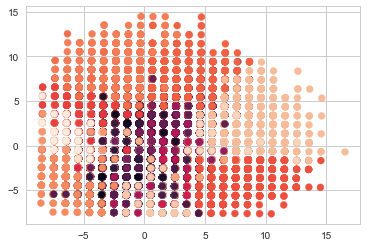

In [281]:
# Turn the  data into two columns with PCA and plot the clustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(X1_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=mbk_means_labels1)
plt.show()

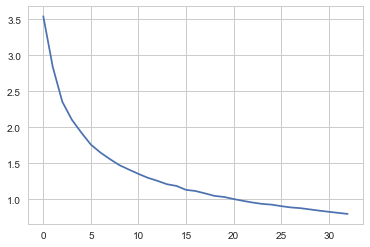

In [282]:
#plot variance for each value for 'k' between 1,10(elbow)
from scipy import cluster
initial = [cluster.vq.kmeans(plot_columns,i) for i in range(1,34)]
plt.plot([var for (cent,var) in initial])
plt.show()